# Kmer-Similarity Code

### Formatting Files

In [43]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib


def to_c0_txt (input_file, output_file):
    df = pd.read_csv(input_file, delimiter=' ', header=0, 
    dtype={"id": str, "number": int, "Sequence": str, "C26": float, 
    "C29": float, "C31": float, "C0": float, "Amplitude": float, "Phase": float}, 
    names = ["id", "number", "Sequence", "C26", "C29", "C31", "C0", "Amplitude", "Phase"],
    usecols = ["Sequence", "C0"]) 

    df.to_csv(output_file, sep=' ', index=False) #import to new txt file

def top_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_75th_percentile = df['C0'].quantile(0.75)#calculate 75th percentile
    filtered_df = df[df['C0'] > c0_75th_percentile] #store each entry where c0 > 75th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file
    
def low_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_25th_percentile = df['C0'].quantile(0.25)#calculate 25th percentile
    filtered_df = df[df['C0'] < c0_25th_percentile] #store each entry where c0 < 25th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file

### Old kmer_similarity function

In [44]:
def kmer_simi_under_5(input_file, kmer_len): #OLD Function
    if kmer_len > 5:
        print("kmer length too large")
        return None
    else:
        with open(input_file, "r") as file: #read file
            lines = file.readlines()
        kmer_dict = {}
        for kmer in map(''.join, itertools.product('ATCG', repeat=kmer_len)): #make all possilbe kmers
            count = 0
            for line in lines: #grab sequence
                columns = line.split()
                seq = columns[0]
                for i in range(len(seq) - kmer_len + 1): #count number of times sequence appears
                    sequence = seq[i:i + kmer_len]
                    if sequence == kmer:
                        count += 1
            kmer_dict[kmer] = count
    

        if kmer_len <= 5: #if too long then matplot will die
            sorted_kmer_dict = {k: v for k, v in sorted(kmer_dict.items(), key=lambda item: item[1], reverse=True)}
            k_mers = list(sorted_kmer_dict.keys())# Extract the k-mers and counts for plotting
            counts = list(sorted_kmer_dict.values())
            fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
            ax.bar(k_mers, counts)
            ax.set_xlabel("K-mer")# Add labels and title
            ax.set_ylabel("Number of Instances")
            ax.set_title("K-mer Similarity")
            plt.xticks(rotation=90)
            plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
            plt.show()# Display the graph
        top_ten_items = sorted(kmer_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        for key, value in top_ten_items:
            print(f"Kmer: {key}, #of_instances: {value}")
        print("\t")


In [58]:
to_c0_txt(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\random.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt")

top_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt")

low_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt")

to_c0_txt(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\chrV.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0_v.txt")

top_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0_v.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt")

low_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0_v.txt" ,r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt")

### New and improved function

In [59]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import os
import time
from itertools import islice

def find_most_frequent_kmers(filename_top, filename_bot, k): #new function
    start_time = time.time()# timing
    kmers_ratio_top = defaultdict(float)#init dicts
    kmers_ratio_bot = defaultdict(float)
    
    with open(filename_top, 'r') as file: # Read the DNA sequences from the file
        sequences_top = file.read().splitlines() # read files
    sequences_top.pop(0) #remove heading
    file_top = os.path.basename(filename_top)[:len(os.path.basename(filename_top)) - 4] #get file name and subtract .txt
    kmers_total_top = (50-k + 1) * (len(sequences_top))/2 #find total possible kmers
    
    with open(filename_bot, 'r') as files:
        sequences_bot = files.read().splitlines()
    sequences_bot.pop(0)
    file_bot = os.path.basename(filename_bot)[:len(os.path.basename(filename_top)) - 4]
    kmers_total_bot = (50-k + 1) * (len(sequences_bot))/2
    
    for line in sequences_top:
        column = line.split() #split into the sequence and c0
        sequence = column[0]
        for i in range(len(sequence) - k + 1): # all kmers in one seq
            kmer = sequence[i:i + k] #find kmer
            kmers_ratio_top[kmer] += 1 #input kmer into dict if exists or create new
    for value in list(kmers_ratio_top.keys()): #find ratio of total
        kmers_ratio_top[value] = (kmers_ratio_top[value]/kmers_total_top) * 100    
        
    for line in sequences_bot:
        column = line.split()
        sequence = column[0]
        for j in range(len(sequence) - k + 1):
            kmer = sequence[j:j + k]
            kmers_ratio_bot[kmer] +=1
    for value in list(kmers_ratio_bot.keys()):
        kmers_ratio_bot[value] = (kmers_ratio_bot[value]/kmers_total_bot) * 100
        
    sorted_kmer_dict = {k: v for k, v in sorted(kmers_ratio_bot.items(), key = lambda item: item[1], reverse = True)[:30]}
    kmers = list(sorted_kmer_dict.keys())
    counts = list(sorted_kmer_dict.values())
    fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
    ax.bar(kmers, counts)
    ax.set_xlabel("K-mer")# Add labels and title
    ax.set_ylabel("Percent Of Total Possible Kmers")
    ax.set_title(f"{file_bot} percent Kmer Length ({k})")
    plt.xticks(rotation=90)
    plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
    plt.show()# Display the graph
    
    sorted_kmer_dict_percent = {k: v for k, v in sorted(kmers_ratio_top.items(), key=lambda item: item[1], reverse=True)[:30]} 
    #top 30 ratios and sort dict
    k_mers = list(sorted_kmer_dict_percent.keys())# Extract the k-mers and counts for plotting
    counts = list(sorted_kmer_dict_percent.values())
    fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
    ax.bar(k_mers, counts)
    ax.set_xlabel("K-mer")# Add labels and title
    ax.set_ylabel("Percent Of Total Possible Kmers")
    ax.set_title(f"{file_top} percent Kmer Length ({k})")
    plt.xticks(rotation=90)
    plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
    plt.show()# Display the graph
    
    top_bot_but_top = defaultdict(float)
    top_top_but_bot = defaultdict(float)
    
    top_ten_items_bot = dict(islice(sorted_kmer_dict.items(), 10))
    for value in (top_ten_items_bot):
        top_bot_but_top[value] = kmers_ratio_top[value] 
    
    top_ten_items_top = dict(islice(sorted_kmer_dict_percent.items(), 10))
    for value in (top_ten_items_top):
        top_top_but_bot[value] = kmers_ratio_bot[value]
    
    keys = list(top_ten_items_bot.keys())
    values1 = list(top_ten_items_bot.values())
    values2 = list(top_bot_but_top.values())
    x = range(len(keys))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, values1, width, label='Top 10 Bottom')
    rects2 = ax.bar([i + width for i in x], values2, width, label='Same Kmers in Top 25')
    ax.set_ylabel('Kmers')
    ax.set_title('Comparison of Top Ten for Bottom 25th Percentile and the same kmers in the Top 25th')
    ax.set_xticks([i + width/2 for i in x])
    plt.xticks(rotation=90)
    ax.set_xticklabels(keys)
    ax.legend()
    plt.show()
    
    keys = list(top_ten_items_top.keys())
    values1 = list(top_ten_items_top.values())
    values2 = list(top_top_but_bot.values())
    x = range(len(keys))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, values1, width, label='Top 10 Top')
    rects2 = ax.bar([i + width for i in x], values2, width, label='Same Kmers in Bottom 25')
    ax.set_ylabel('Kmers')
    ax.set_title('Comparison of Top Ten for Top 25th Percentile and the same kmers in the Bottom 25th')
    ax.set_xticks([i + width/2 for i in x])
    plt.xticks(rotation=90)
    ax.set_xticklabels(keys)
    ax.legend()
    plt.show()
    
    print("Top Ten Ratios (Bottom 25)")
    for key, value in top_ten_items_top.items():
        print(f"Kmer: {key}, percent_instances: {value}")
    print("\nTop Ten Ratios (Top 25)")
    for key, value in top_ten_items_bot.items():
        print(f"Kmer: {key}, percent_instances: {value}")
    
    elapsed = time.time() - start_time
    print(f"\nTime elapsed: {elapsed} seconds")

# Kmer Length (3) using random.txt

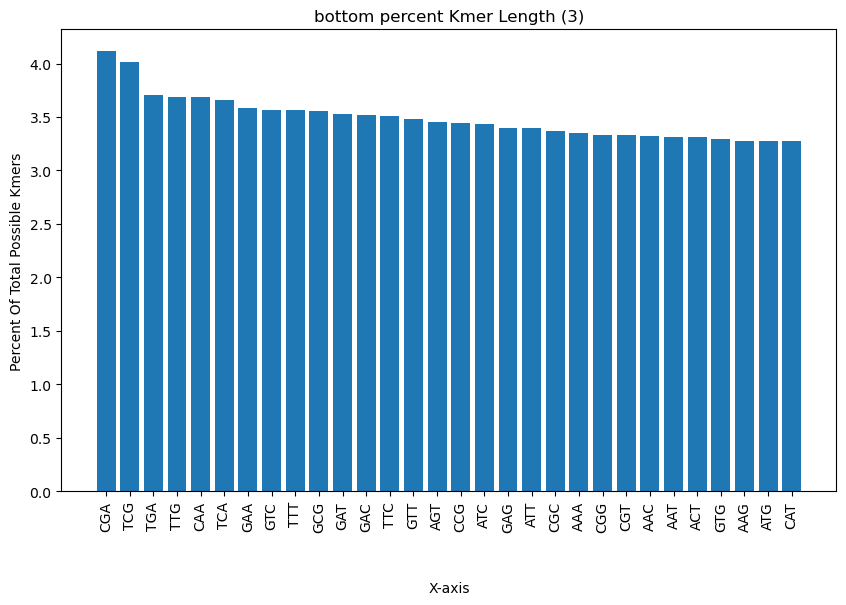

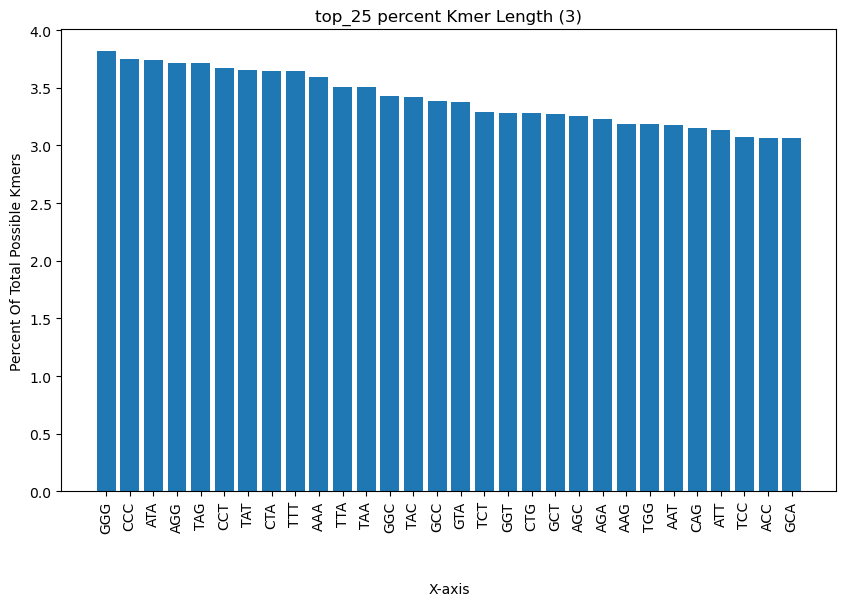

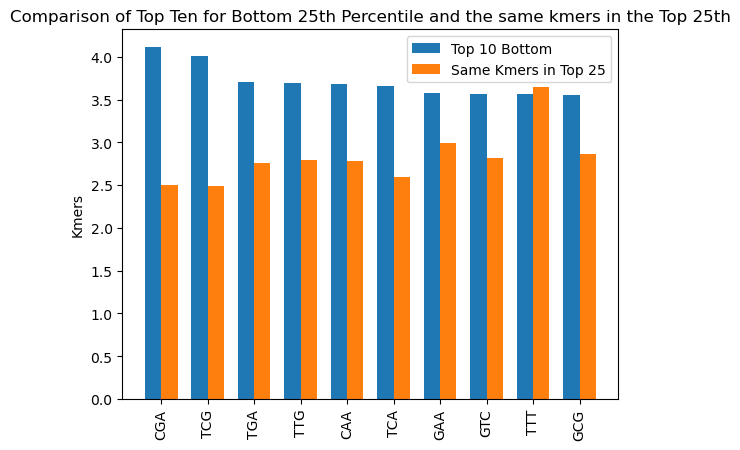

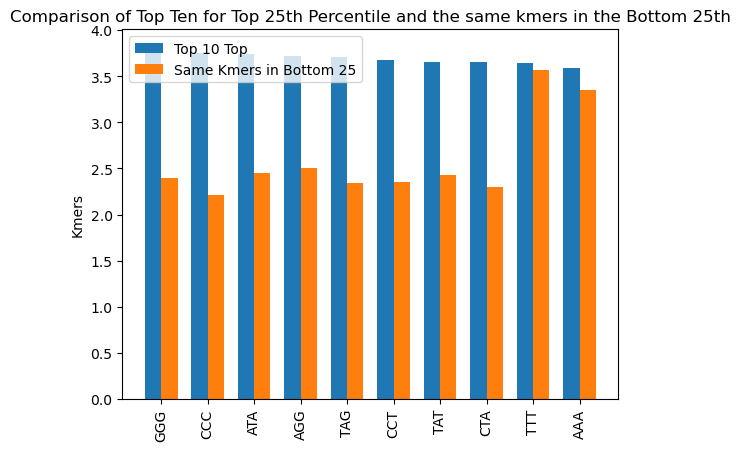

Top Ten Ratios (Bottom 25)
Kmer: GGG, percent_instances: 3.81521274321146
Kmer: CCC, percent_instances: 3.749732734658969
Kmer: ATA, percent_instances: 3.7417147744280523
Kmer: AGG, percent_instances: 3.714988240324995
Kmer: TAG, percent_instances: 3.710979260209536
Kmer: CCT, percent_instances: 3.6722257857601024
Kmer: TAT, percent_instances: 3.6548535385931156
Kmer: CTA, percent_instances: 3.649508231772504
Kmer: TTT, percent_instances: 3.642826598246739
Kmer: AAA, percent_instances: 3.5920461834509303

Top Ten Ratios (Top 25)
Kmer: CGA, percent_instances: 4.113213598460551
Kmer: TCG, percent_instances: 4.012989095574087
Kmer: TGA, percent_instances: 3.7083066067992303
Kmer: TTG, percent_instances: 3.6909343596322426
Kmer: CAA, percent_instances: 3.684252726106479
Kmer: TCA, percent_instances: 3.6588625187085735
Kmer: GAA, percent_instances: 3.581355569809707
Kmer: GTC, percent_instances: 3.566655976053026
Kmer: TTT, percent_instances: 3.562646995937567
Kmer: GCG, percent_instances: 

In [60]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 3)

# Kmer Length (4) using random.txt

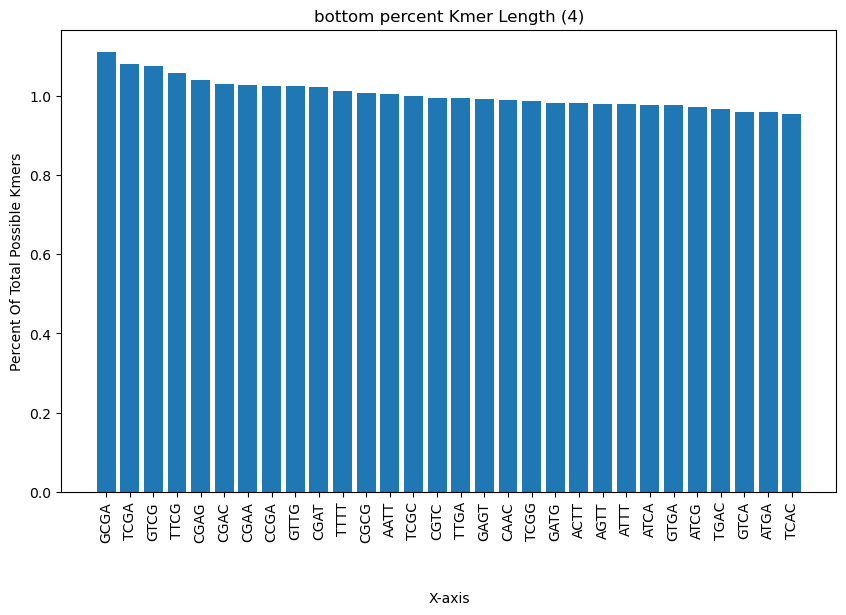

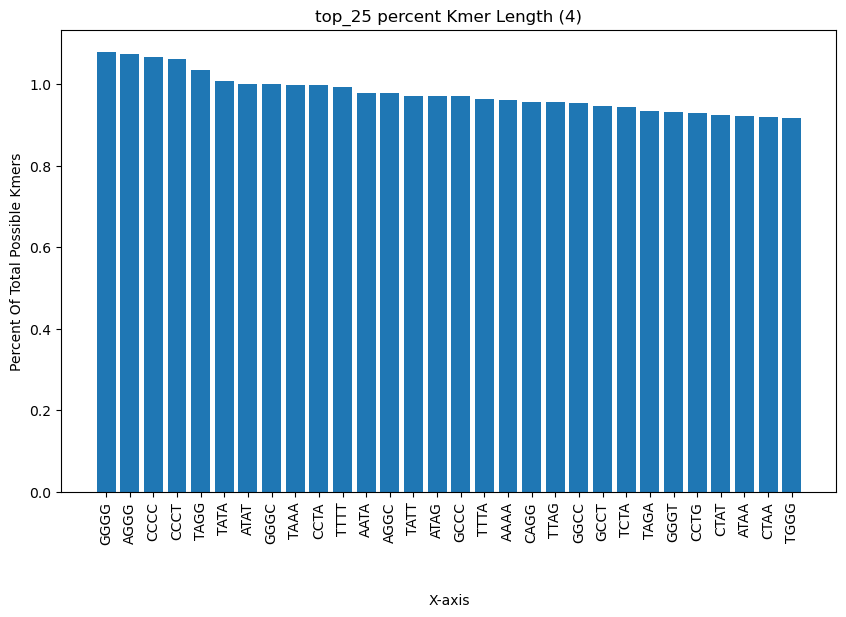

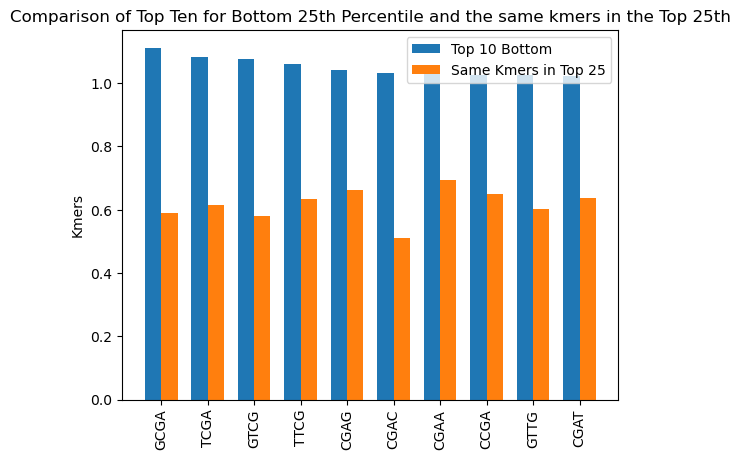

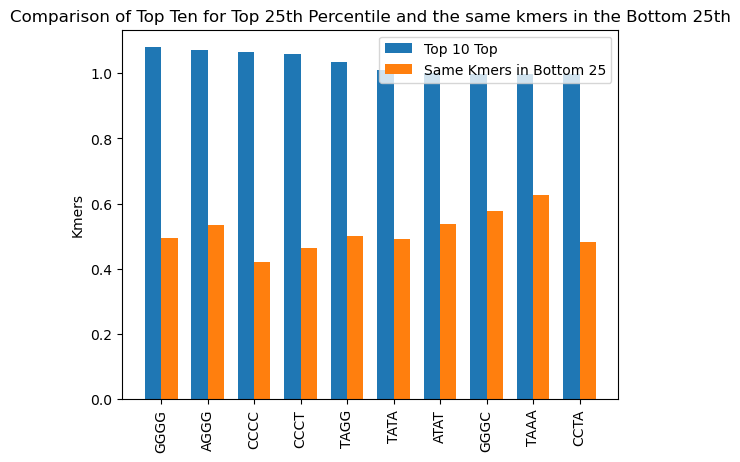

Top Ten Ratios (Bottom 25)
Kmer: GGGG, percent_instances: 1.0795245178988169
Kmer: AGGG, percent_instances: 1.0727007219576106
Kmer: CCCC, percent_instances: 1.0658769260164043
Kmer: CCCT, percent_instances: 1.0604178892634395
Kmer: TAGG, percent_instances: 1.034487464686856
Kmer: TATA, percent_instances: 1.0085570401102726
Kmer: ATAT, percent_instances: 1.0003684849808252
Kmer: GGGC, percent_instances: 0.9990037257925839
Kmer: TAAA, percent_instances: 0.9976389666043427
Kmer: CCTA, percent_instances: 0.9976389666043427

Top Ten Ratios (Top 25)
Kmer: GCGA, percent_instances: 1.1122787384166064
Kmer: TCGA, percent_instances: 1.080889277087058
Kmer: GTCG, percent_instances: 1.075430240334093
Kmer: TTCG, percent_instances: 1.0590531300751982
Kmer: CGAG, percent_instances: 1.039946501439821
Kmer: CGAC, percent_instances: 1.0303931871221323
Kmer: CGAA, percent_instances: 1.029028427933891
Kmer: CCGA, percent_instances: 1.0262989095574084
Kmer: GTTG, percent_instances: 1.0262989095574084
Kme

In [61]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 4)

# Kmer Length (5) using random.txt

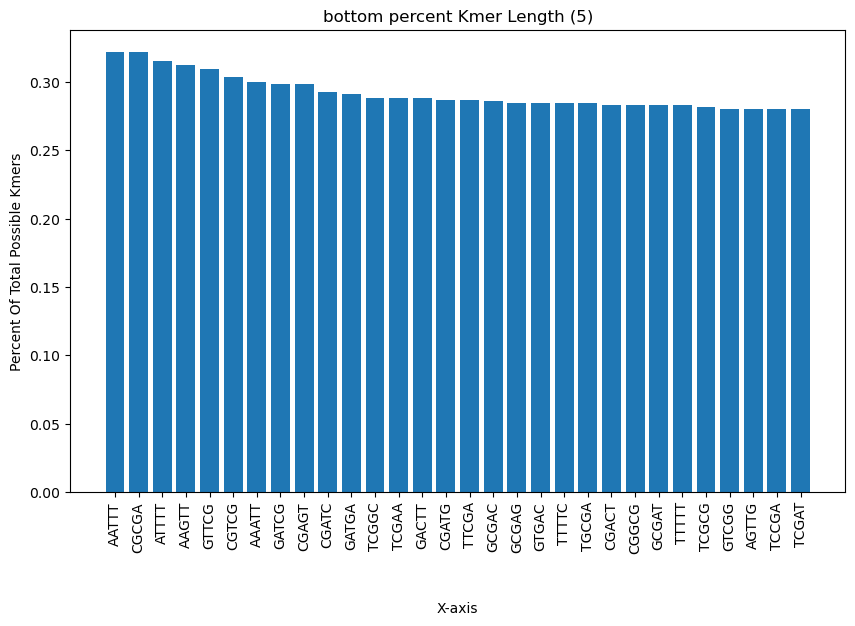

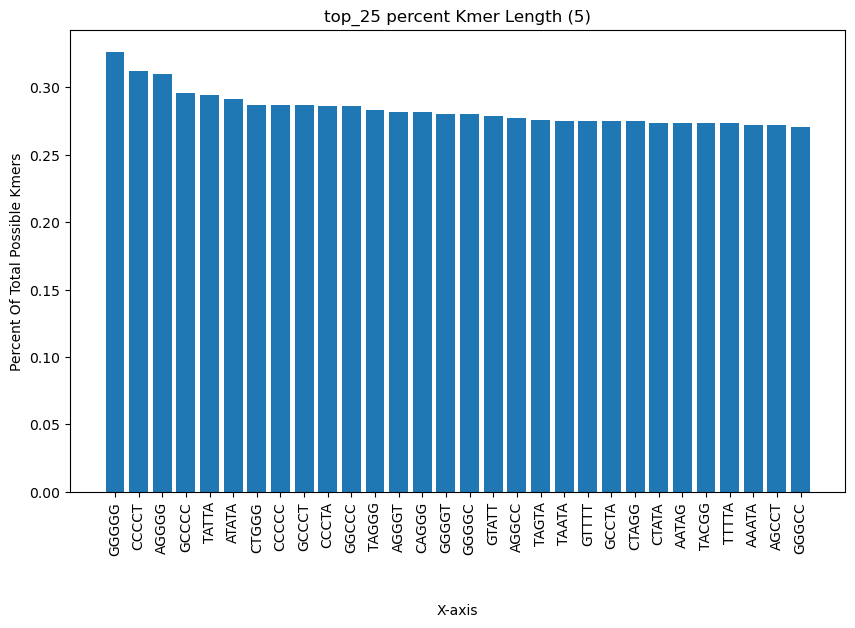

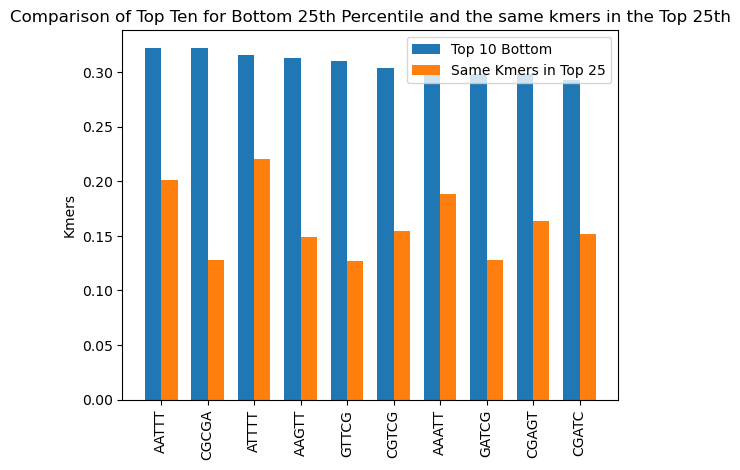

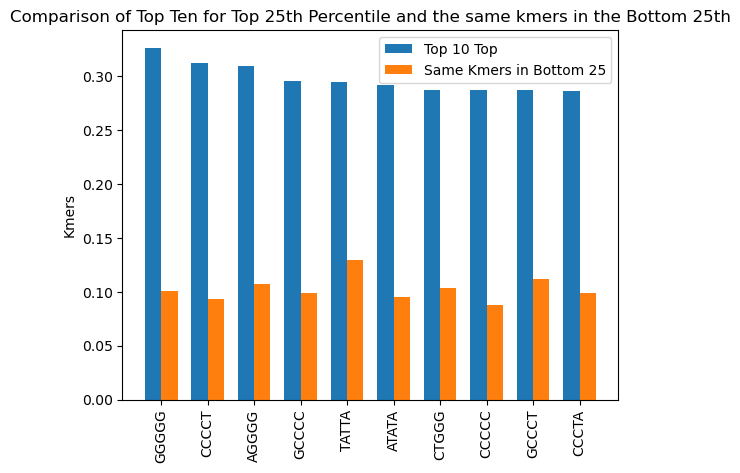

Top Ten Ratios (Bottom 25)
Kmer: GGGGG, percent_instances: 0.3262961207016761
Kmer: CCCCT, percent_instances: 0.3123518420392113
Kmer: AGGGG, percent_instances: 0.30956298630671836
Kmer: GCCCC, percent_instances: 0.2956187076442536
Kmer: TATTA, percent_instances: 0.2942242797780071
Kmer: ATATA, percent_instances: 0.2914354240455141
Kmer: CTGGG, percent_instances: 0.2872521404467747
Kmer: CCCCC, percent_instances: 0.2872521404467747
Kmer: GCCCT, percent_instances: 0.2872521404467747
Kmer: CCCTA, percent_instances: 0.2858577125805282

Top Ten Ratios (Top 25)
Kmer: AATTT, percent_instances: 0.32211283710293664
Kmer: CGCGA, percent_instances: 0.32211283710293664
Kmer: ATTTT, percent_instances: 0.3151406977717043
Kmer: AAGTT, percent_instances: 0.3123518420392113
Kmer: GTTCG, percent_instances: 0.30956298630671836
Kmer: CGTCG, percent_instances: 0.30398527484173243
Kmer: AAATT, percent_instances: 0.299801991242993
Kmer: GATCG, percent_instances: 0.2984075633767465
Kmer: CGAGT, percent_insta

In [49]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt",5)

# Kmer Length (6) using random.txt

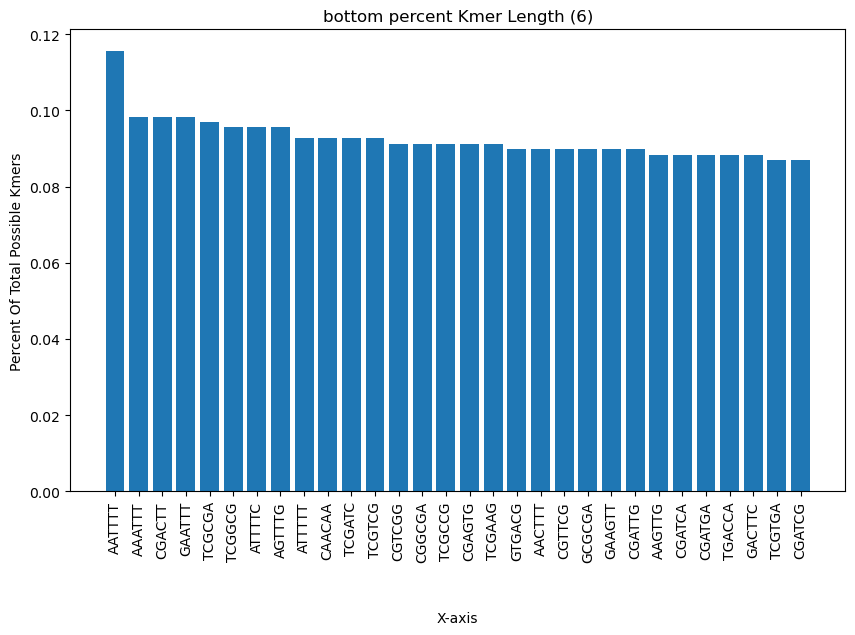

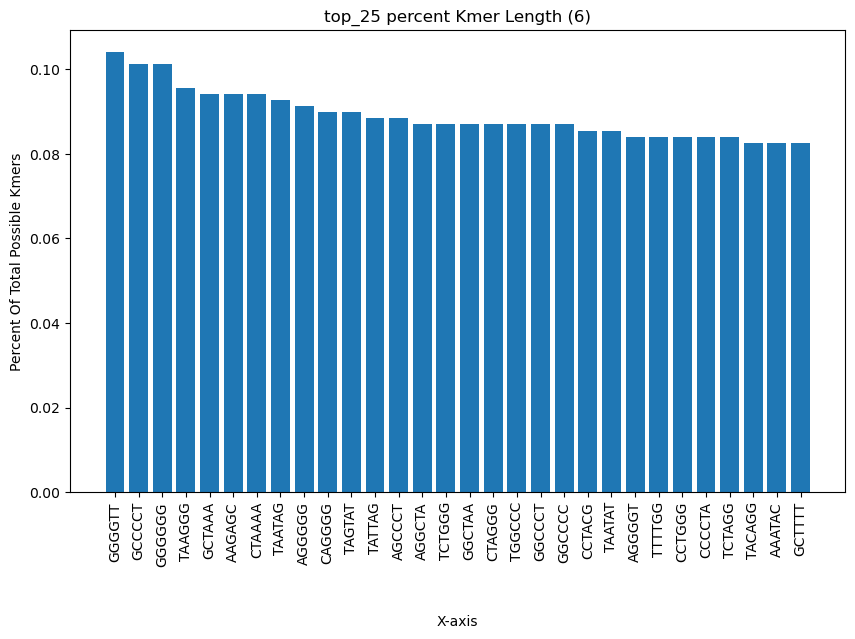

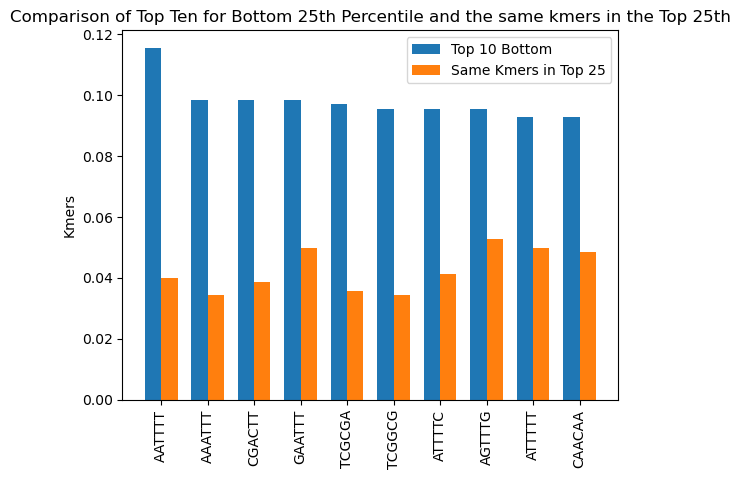

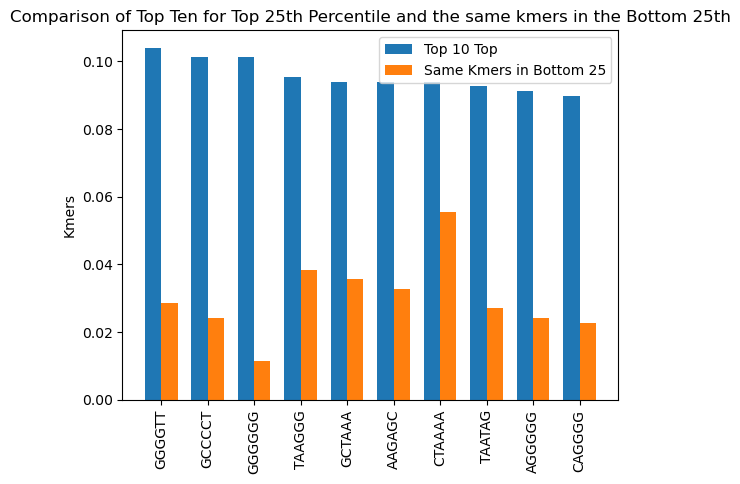

Top Ten Ratios (Bottom 25)
Kmer: GGGGTT, percent_instances: 0.10405530610790392
Kmer: GCCCCT, percent_instances: 0.10120447580357779
Kmer: GGGGGG, percent_instances: 0.10120447580357779
Kmer: TAAGGG, percent_instances: 0.09550281519492551
Kmer: GCTAAA, percent_instances: 0.09407740004276245
Kmer: AAGAGC, percent_instances: 0.09407740004276245
Kmer: CTAAAA, percent_instances: 0.09407740004276245
Kmer: TAATAG, percent_instances: 0.09265198489059939
Kmer: AGGGGG, percent_instances: 0.09122656973843632
Kmer: CAGGGG, percent_instances: 0.08980115458627325

Top Ten Ratios (Top 25)
Kmer: AATTTT, percent_instances: 0.11545862732520845
Kmer: AAATTT, percent_instances: 0.09835364549925167
Kmer: CGACTT, percent_instances: 0.09835364549925167
Kmer: GAATTT, percent_instances: 0.09835364549925167
Kmer: TCGCGA, percent_instances: 0.0969282303470886
Kmer: TCGGCG, percent_instances: 0.09550281519492551
Kmer: ATTTTC, percent_instances: 0.09550281519492551
Kmer: AGTTTG, percent_instances: 0.0955028151949

In [50]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 6)

# Kmer Length (7) using random.txt

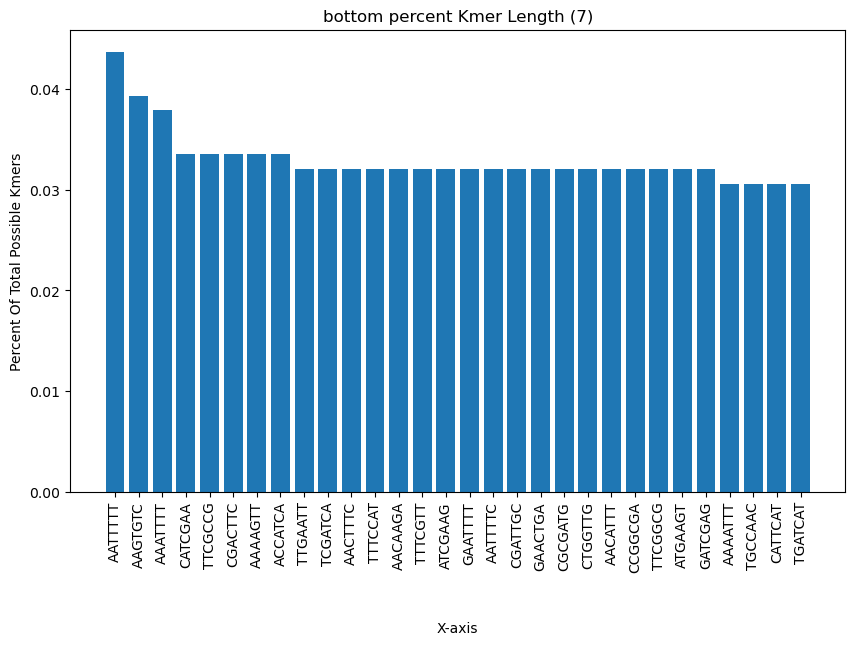

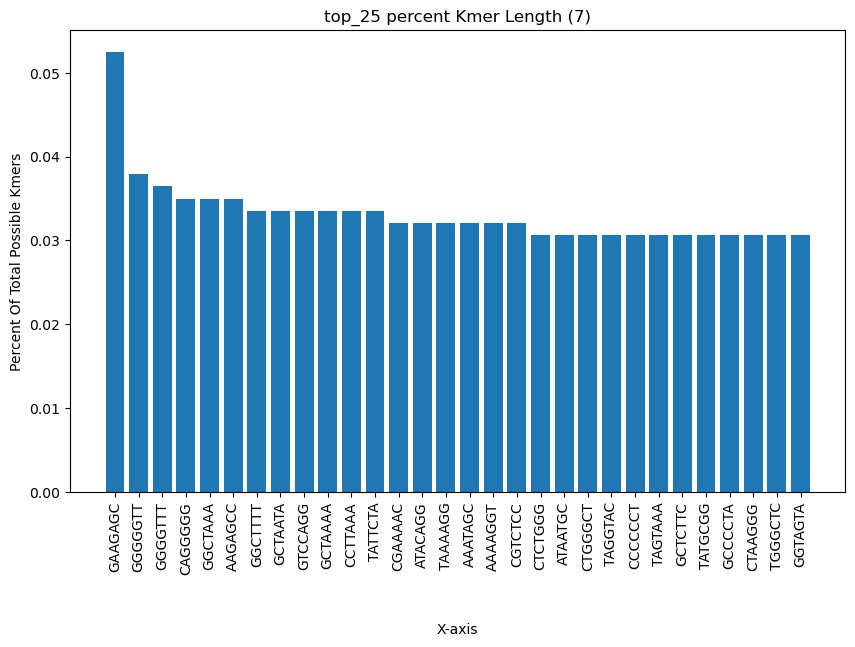

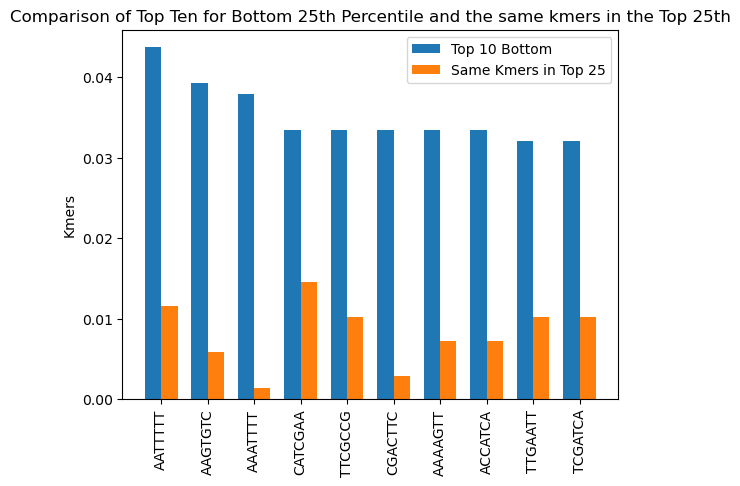

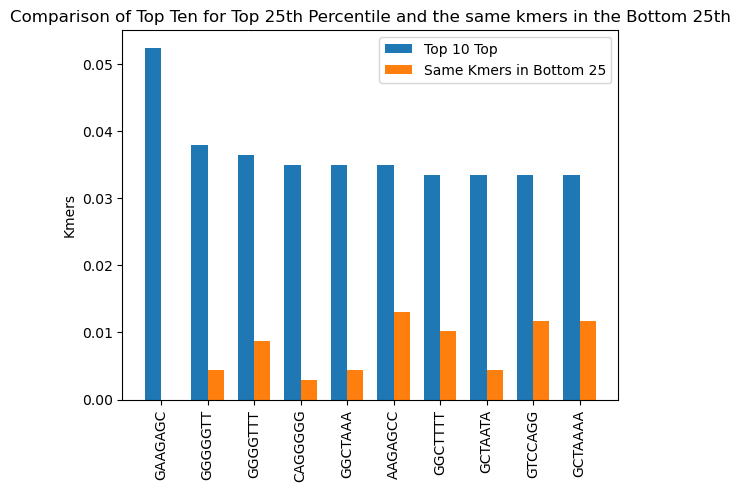

Top Ten Ratios (Bottom 25)
Kmer: GAAGAGC, percent_instances: 0.05248119423873112
Kmer: GGGGGTT, percent_instances: 0.03790308472797248
Kmer: GGGGTTT, percent_instances: 0.03644527377689661
Kmer: CAGGGGG, percent_instances: 0.03498746282582075
Kmer: GGCTAAA, percent_instances: 0.03498746282582075
Kmer: AAGAGCC, percent_instances: 0.03498746282582075
Kmer: GGCTTTT, percent_instances: 0.03352965187474488
Kmer: GCTAATA, percent_instances: 0.03352965187474488
Kmer: GTCCAGG, percent_instances: 0.03352965187474488
Kmer: GCTAAAA, percent_instances: 0.03352965187474488

Top Ten Ratios (Top 25)
Kmer: AATTTTT, percent_instances: 0.043734328532275935
Kmer: AAGTGTC, percent_instances: 0.039360895679048345
Kmer: AAATTTT, percent_instances: 0.03790308472797248
Kmer: CATCGAA, percent_instances: 0.03352965187474488
Kmer: TTCGCCG, percent_instances: 0.03352965187474488
Kmer: CGACTTC, percent_instances: 0.03352965187474488
Kmer: AAAAGTT, percent_instances: 0.03352965187474488
Kmer: ACCATCA, percent_insta

In [62]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 7)

# Kmer Length (8) using random.txt

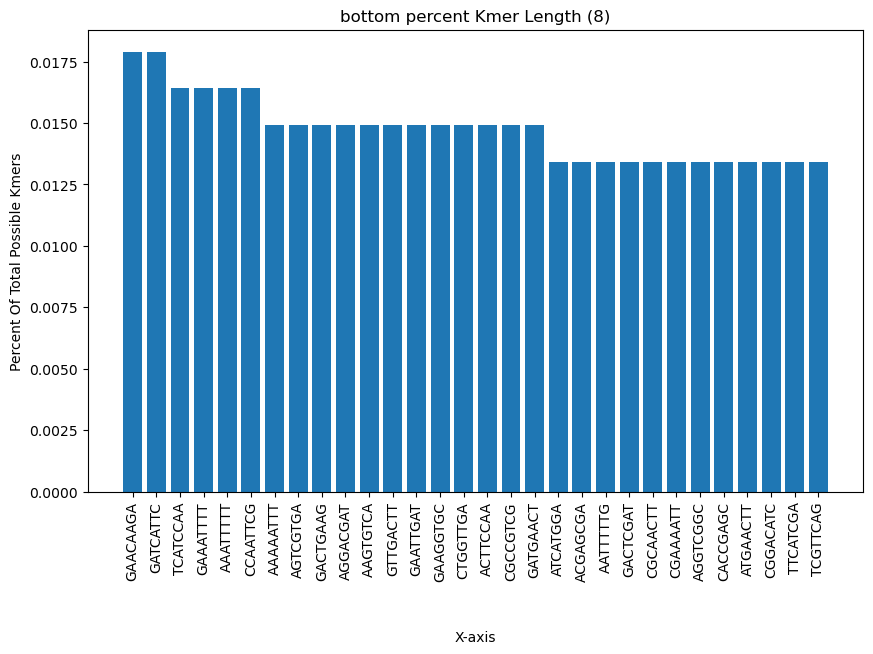

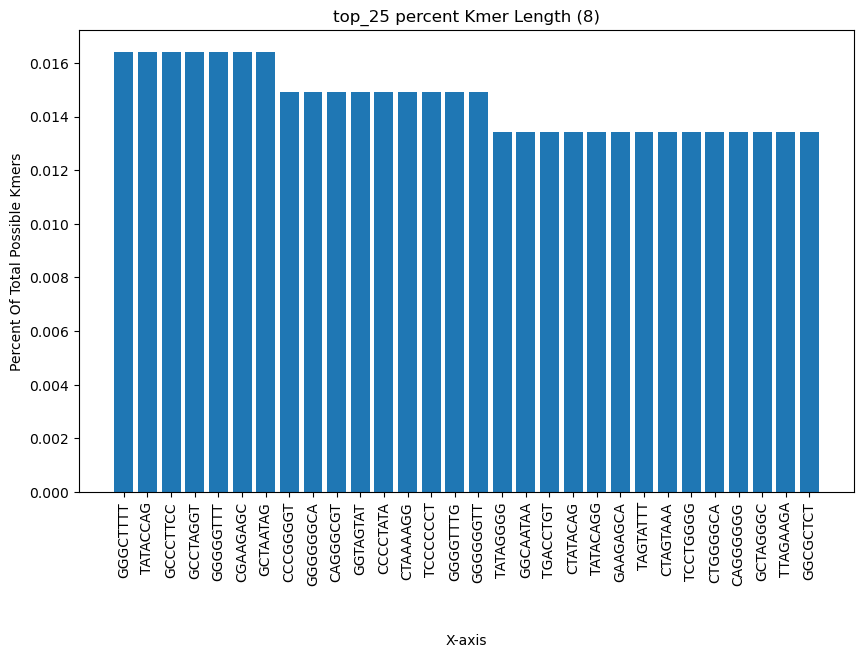

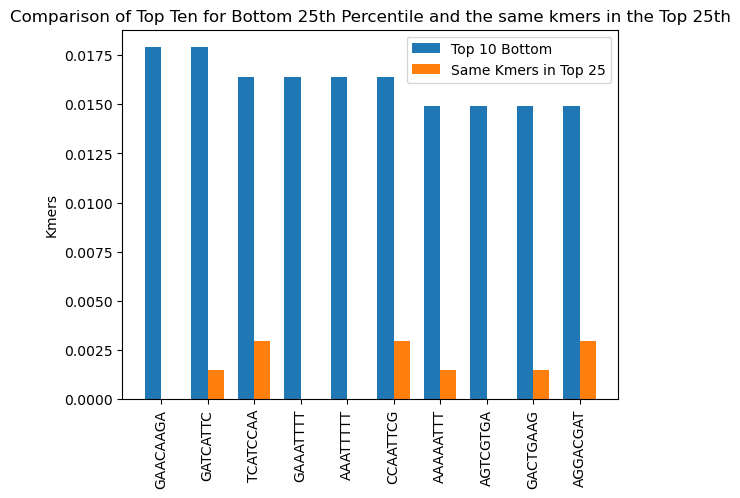

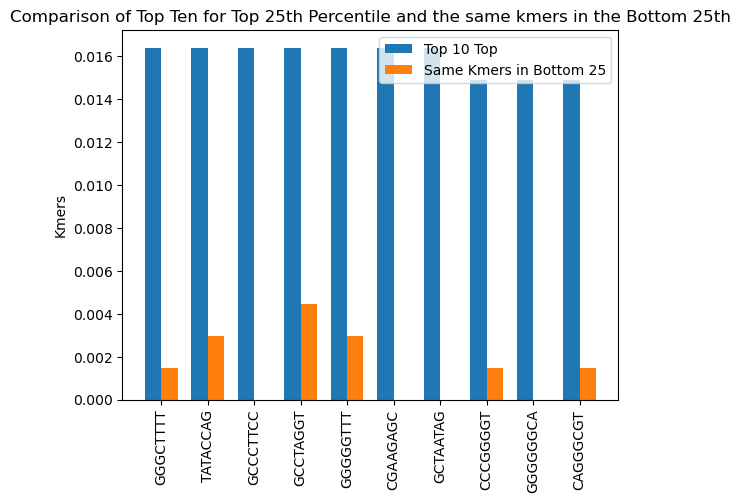

Top Ten Ratios (Bottom 25)
Kmer: GGGCTTTT, percent_instances: 0.01640884884466787
Kmer: TATACCAG, percent_instances: 0.01640884884466787
Kmer: GCCCTTCC, percent_instances: 0.01640884884466787
Kmer: GCCTAGGT, percent_instances: 0.01640884884466787
Kmer: GGGGGTTT, percent_instances: 0.01640884884466787
Kmer: CGAAGAGC, percent_instances: 0.01640884884466787
Kmer: GCTAATAG, percent_instances: 0.01640884884466787
Kmer: CCCGGGGT, percent_instances: 0.014917135313334426
Kmer: GGGGGGCA, percent_instances: 0.014917135313334426
Kmer: CAGGGCGT, percent_instances: 0.014917135313334426

Top Ten Ratios (Top 25)
Kmer: GAACAAGA, percent_instances: 0.017900562376001315
Kmer: GATCATTC, percent_instances: 0.017900562376001315
Kmer: TCATCCAA, percent_instances: 0.01640884884466787
Kmer: GAAATTTT, percent_instances: 0.01640884884466787
Kmer: AAATTTTT, percent_instances: 0.01640884884466787
Kmer: CCAATTCG, percent_instances: 0.01640884884466787
Kmer: AAAAATTT, percent_instances: 0.014917135313334426
Kmer: A

In [52]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 8)

# Kmer Length (9) using random.txt

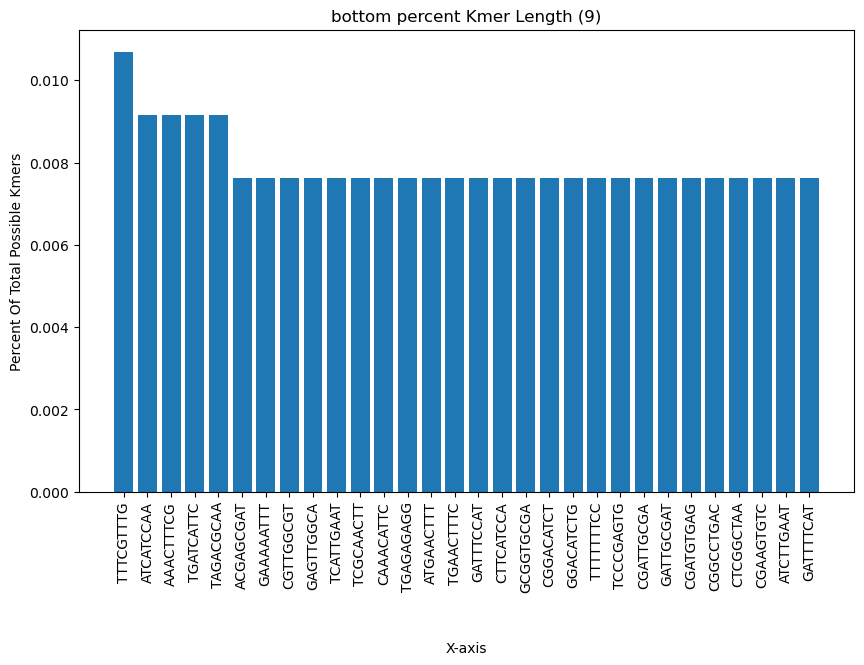

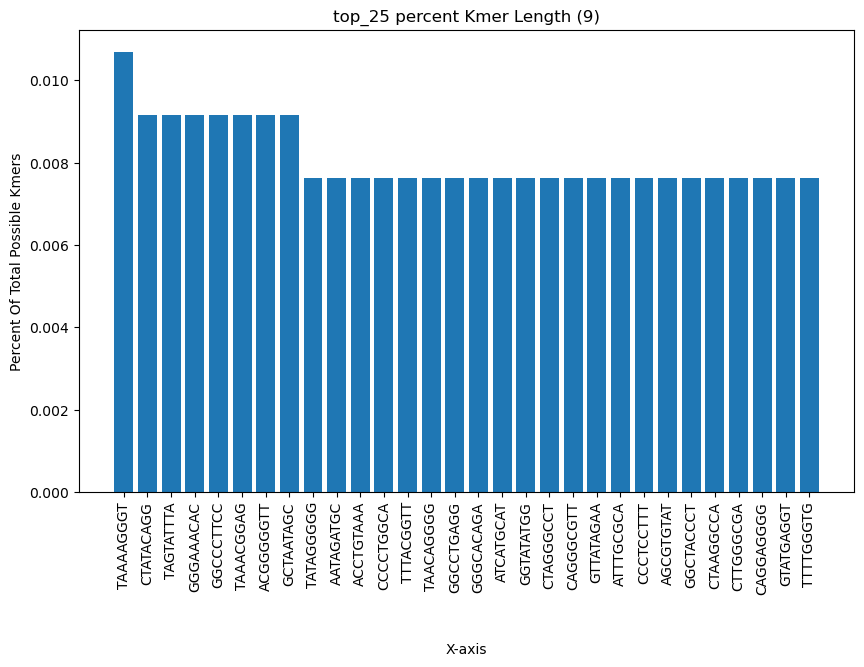

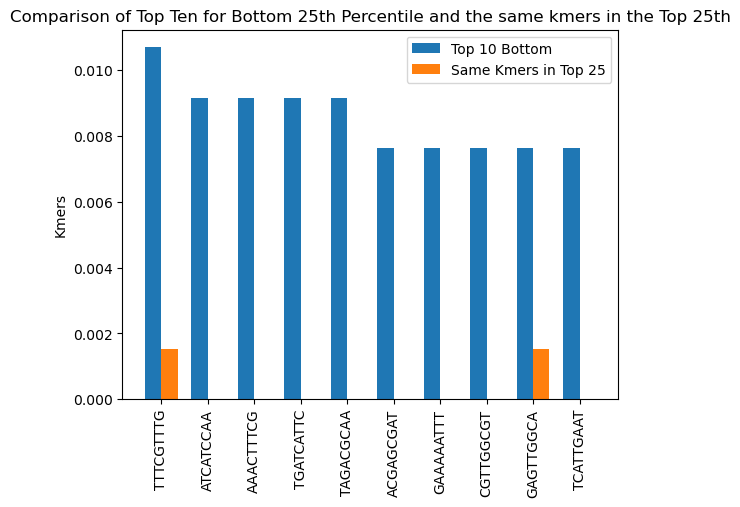

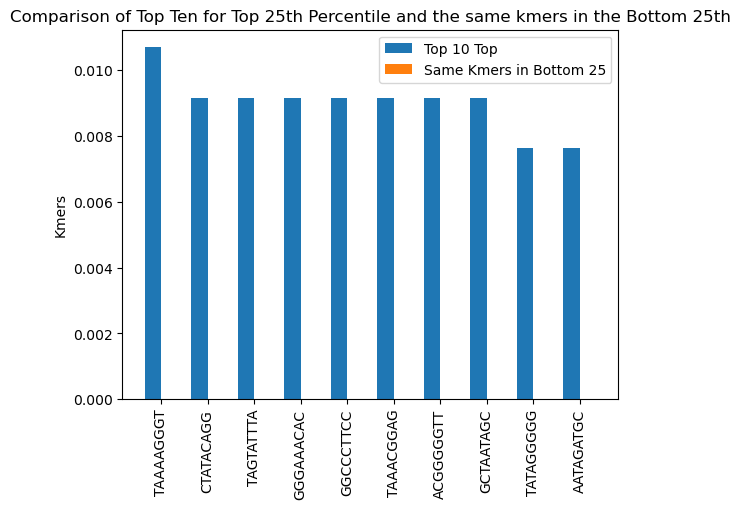

Top Ten Ratios (Bottom 25)
Kmer: TAAAAGGGT, percent_instances: 0.010690613641223005
Kmer: CTATACAGG, percent_instances: 0.009163383121048292
Kmer: TAGTATTTA, percent_instances: 0.009163383121048292
Kmer: GGGAAACAC, percent_instances: 0.009163383121048292
Kmer: GGCCCTTCC, percent_instances: 0.009163383121048292
Kmer: TAAACGGAG, percent_instances: 0.009163383121048292
Kmer: ACGGGGGTT, percent_instances: 0.009163383121048292
Kmer: GCTAATAGC, percent_instances: 0.009163383121048292
Kmer: TATAGGGGG, percent_instances: 0.007636152600873577
Kmer: AATAGATGC, percent_instances: 0.007636152600873577

Top Ten Ratios (Top 25)
Kmer: TTTCGTTTG, percent_instances: 0.010690613641223005
Kmer: ATCATCCAA, percent_instances: 0.009163383121048292
Kmer: AAACTTTCG, percent_instances: 0.009163383121048292
Kmer: TGATCATTC, percent_instances: 0.009163383121048292
Kmer: TAGACGCAA, percent_instances: 0.009163383121048292
Kmer: ACGAGCGAT, percent_instances: 0.007636152600873577
Kmer: GAAAAATTT, percent_instances: 

In [53]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 9)

# Kmer Length (10) using random.txt

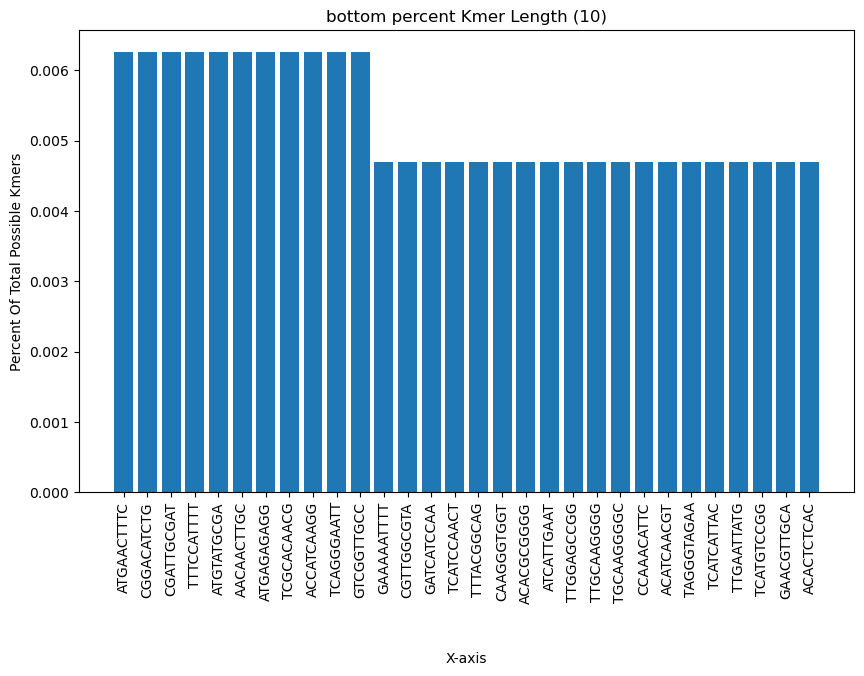

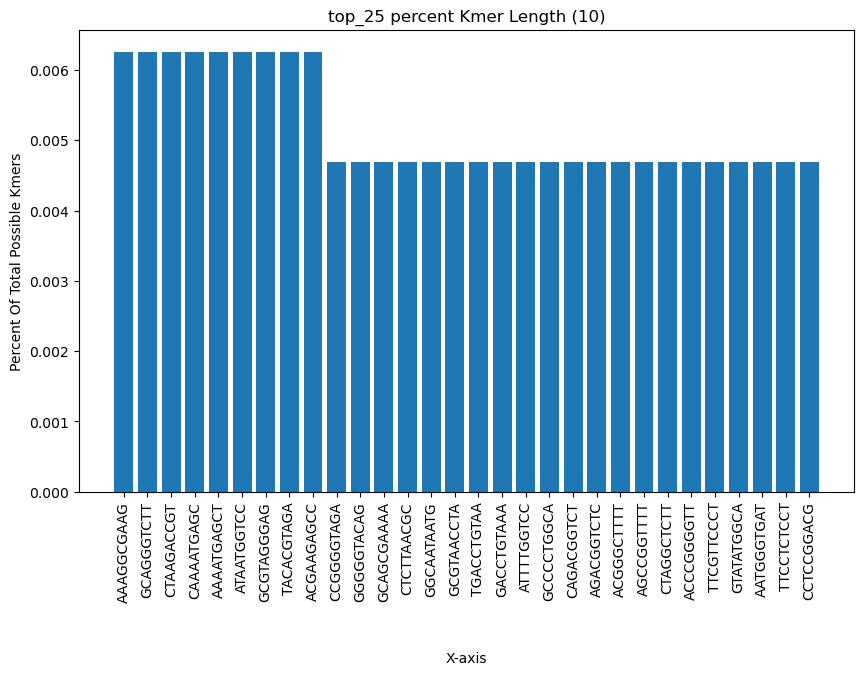

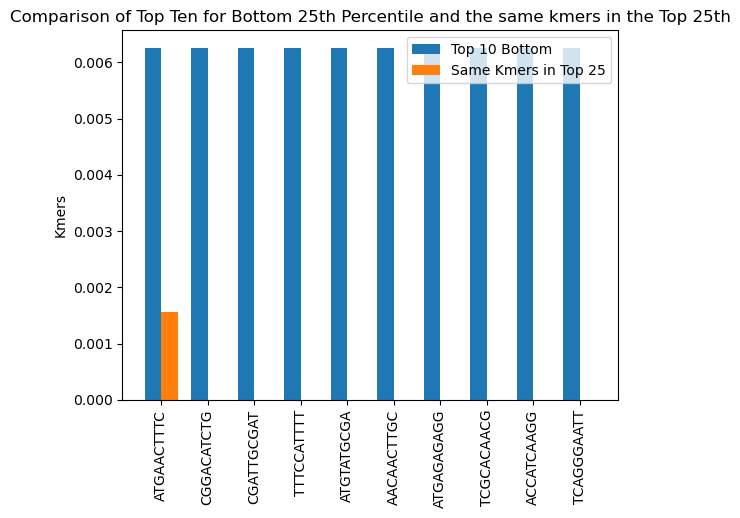

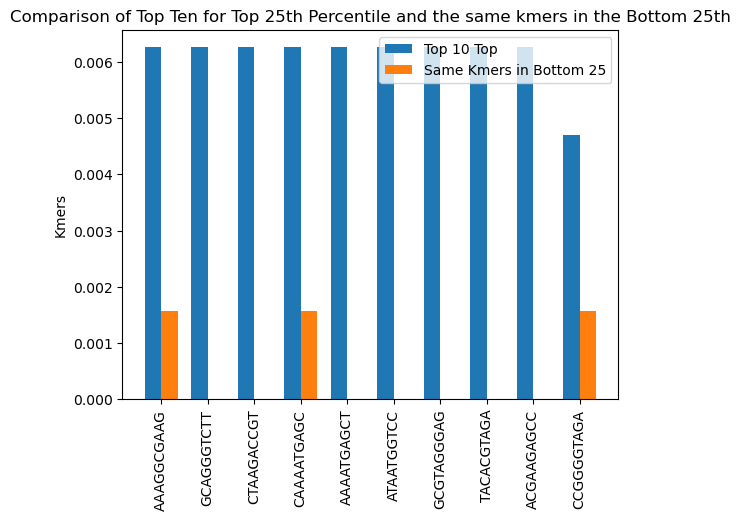

Top Ten Ratios (Bottom 25)
Kmer: AAAGGCGAAG, percent_instances: 0.006257920180228101
Kmer: GCAGGGTCTT, percent_instances: 0.006257920180228101
Kmer: CTAAGACCGT, percent_instances: 0.006257920180228101
Kmer: CAAAATGAGC, percent_instances: 0.006257920180228101
Kmer: AAAATGAGCT, percent_instances: 0.006257920180228101
Kmer: ATAATGGTCC, percent_instances: 0.006257920180228101
Kmer: GCGTAGGGAG, percent_instances: 0.006257920180228101
Kmer: TACACGTAGA, percent_instances: 0.006257920180228101
Kmer: ACGAAGAGCC, percent_instances: 0.006257920180228101
Kmer: CCGGGGTAGA, percent_instances: 0.004693440135171076

Top Ten Ratios (Top 25)
Kmer: ATGAACTTTC, percent_instances: 0.006257920180228101
Kmer: CGGACATCTG, percent_instances: 0.006257920180228101
Kmer: CGATTGCGAT, percent_instances: 0.006257920180228101
Kmer: TTTCCATTTT, percent_instances: 0.006257920180228101
Kmer: ATGTATGCGA, percent_instances: 0.006257920180228101
Kmer: AACAACTTGC, percent_instances: 0.006257920180228101
Kmer: ATGAGAGAGG, pe

In [54]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 10)

$\;\;\;\;\;\;\;\;\;\;\;\;$

# Kmer Length (3) using chrV.txt

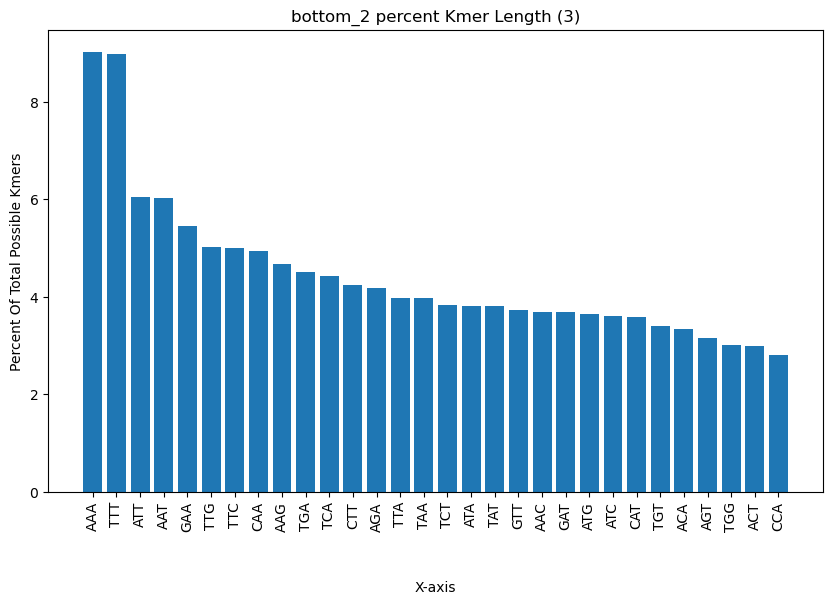

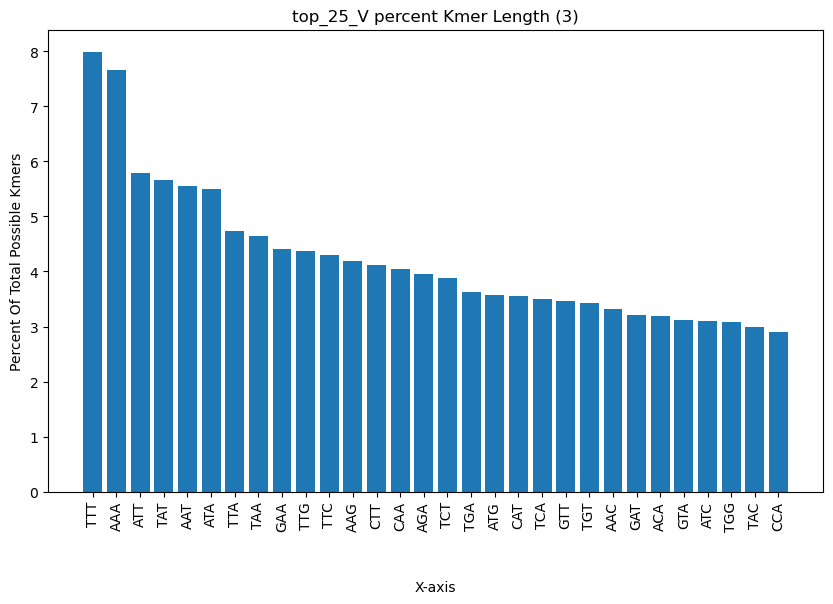

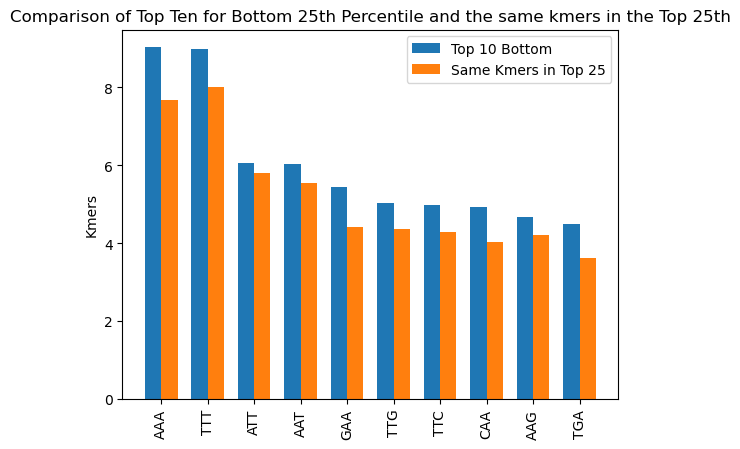

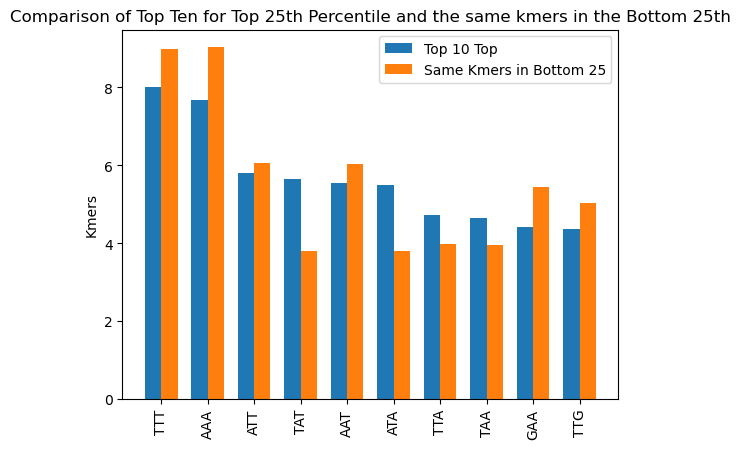

Top Ten Ratios (Bottom 25)
Kmer: TTT, percent_instances: 7.998398136012814
Kmer: AAA, percent_instances: 7.665485494231672
Kmer: ATT, percent_instances: 5.790576509230943
Kmer: TAT, percent_instances: 5.656278821416437
Kmer: AAT, percent_instances: 5.546049544520493
Kmer: ATA, percent_instances: 5.503778133747553
Kmer: TTA, percent_instances: 4.729139362166885
Kmer: TAA, percent_instances: 4.640753685096192
Kmer: GAA, percent_instances: 4.40856430917593
Kmer: TTG, percent_instances: 4.36791094283449

Top Ten Ratios (Top 25)
Kmer: AAA, percent_instances: 9.030508227755934
Kmer: TTT, percent_instances: 8.981764639256994
Kmer: ATT, percent_instances: 6.05007038493277
Kmer: AAT, percent_instances: 6.027013251783894
Kmer: GAA, percent_instances: 5.446135300875362
Kmer: TTG, percent_instances: 5.022612170930214
Kmer: TTC, percent_instances: 4.992678348947463
Kmer: CAA, percent_instances: 4.939687393815834
Kmer: AAG, percent_instances: 4.664013073799007
Kmer: TGA, percent_instances: 4.4987702

In [63]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 3)

# Kmer Length (4) using chrV.txt

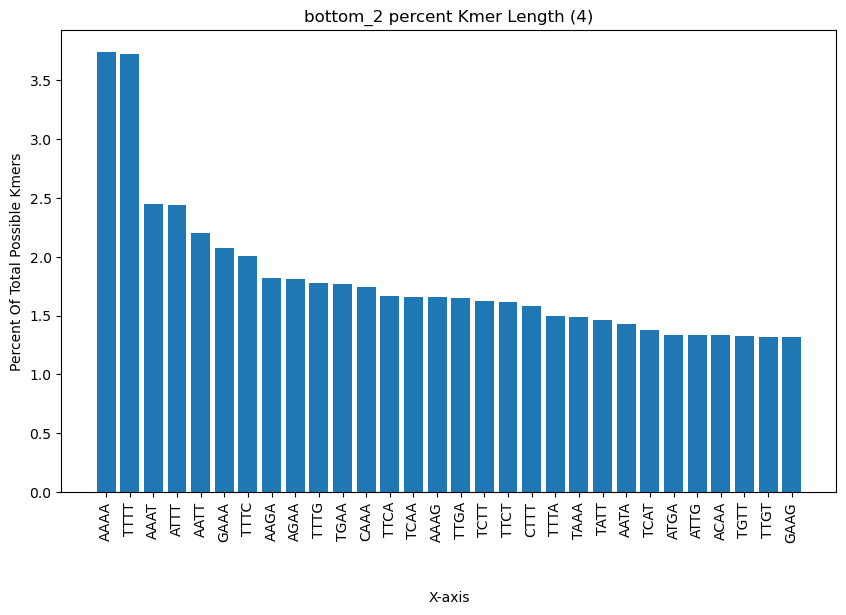

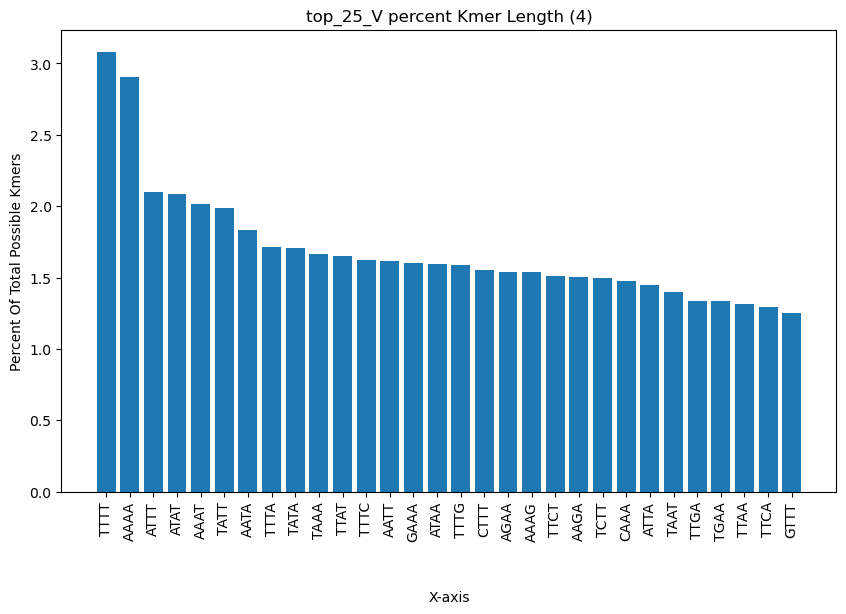

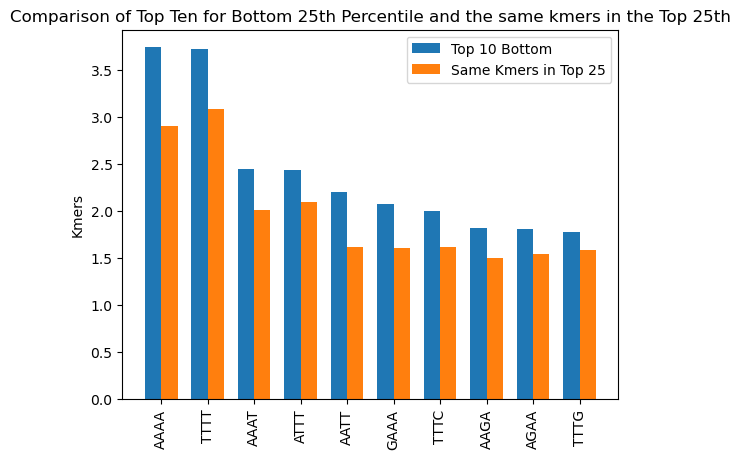

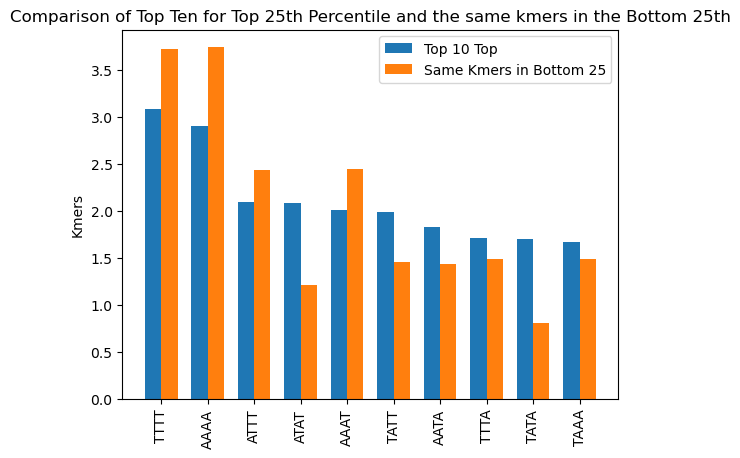

Top Ten Ratios (Bottom 25)
Kmer: TTTT, percent_instances: 3.08185824484868
Kmer: AAAA, percent_instances: 2.9048372987471174
Kmer: ATTT, percent_instances: 2.0969855832241153
Kmer: ATAT, percent_instances: 2.0817002273180294
Kmer: AAAT, percent_instances: 2.0129161257406425
Kmer: TATT, percent_instances: 1.9887487386999394
Kmer: AATA, percent_instances: 1.8317640023671644
Kmer: TTTA, percent_instances: 1.7123729792088178
Kmer: TATA, percent_instances: 1.7055565367101577
Kmer: TAAA, percent_instances: 1.6665169114905596

Top Ten Ratios (Top 25)
Kmer: AAAA, percent_instances: 3.7403679019919505
Kmer: TTTT, percent_instances: 3.721571045404737
Kmer: AAAT, percent_instances: 2.4448307095193687
Kmer: ATTT, percent_instances: 2.438633943611496
Kmer: AATT, percent_instances: 2.2035699568395253
Kmer: GAAA, percent_instances: 2.071991960729029
Kmer: TTTC, percent_instances: 2.003207859151642
Kmer: AAGA, percent_instances: 1.8216426180509726
Kmer: AGAA, percent_instances: 1.8131737046435465
Kmer

In [64]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 4)

# Kmer Length (5) using chrV.txt

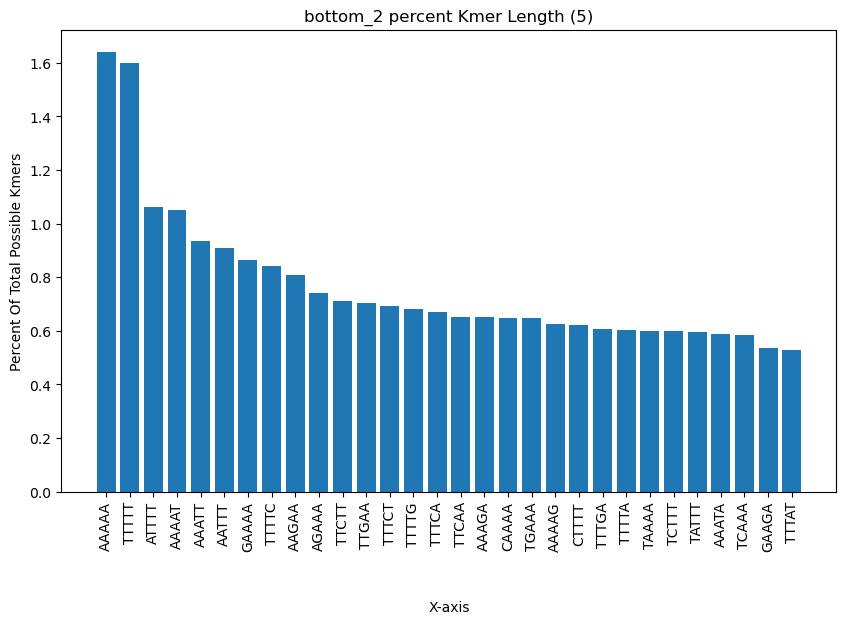

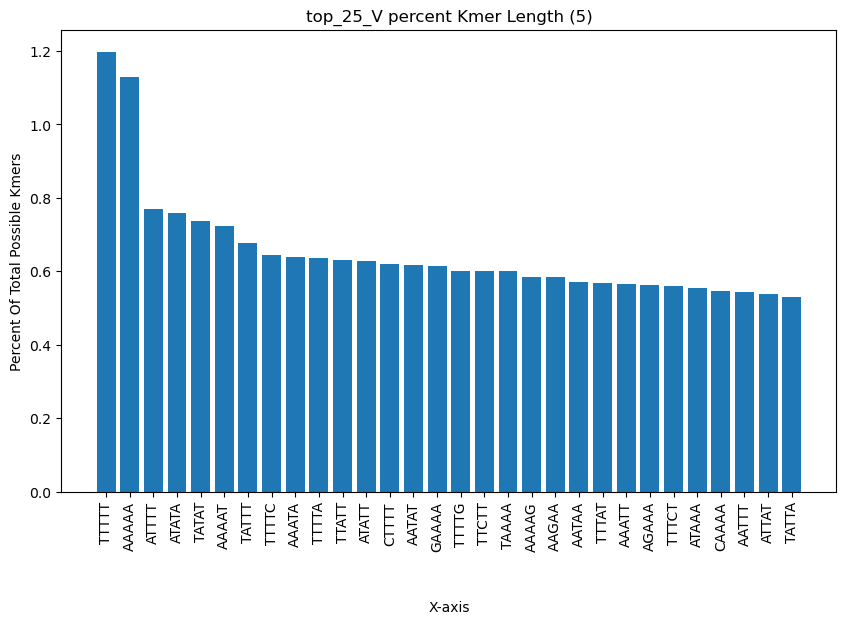

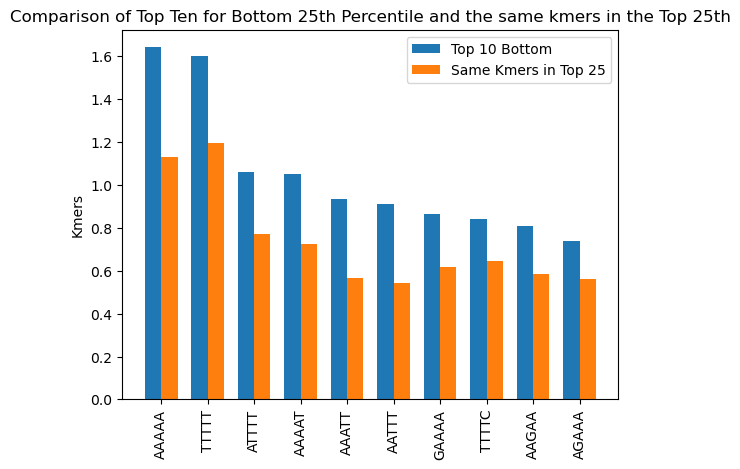

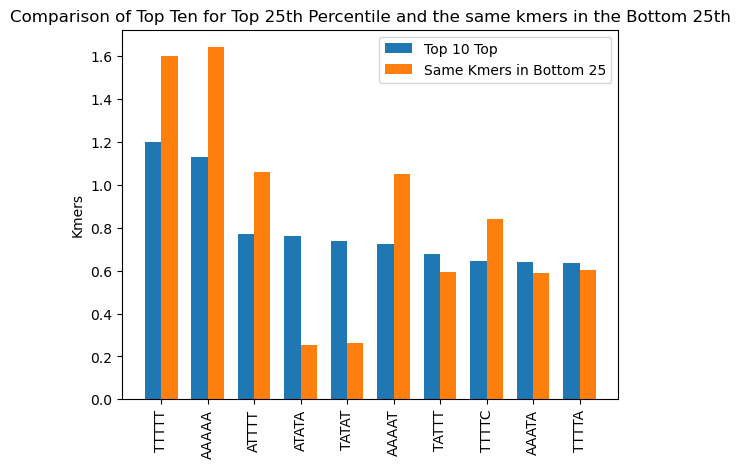

Top Ten Ratios (Bottom 25)
Kmer: TTTTT, percent_instances: 1.1979156773731963
Kmer: AAAAA, percent_instances: 1.1293246634291707
Kmer: ATTTT, percent_instances: 0.7694856518151293
Kmer: ATATA, percent_instances: 0.7597773852261287
Kmer: TATAT, percent_instances: 0.7380393100377145
Kmer: AAAAT, percent_instances: 0.7232658608805398
Kmer: TATTT, percent_instances: 0.6785234148616678
Kmer: TTTTC, percent_instances: 0.6443334325264919
Kmer: AAATA, percent_instances: 0.6390572006846438
Kmer: TTTTA, percent_instances: 0.6369467079479046

Top Ten Ratios (Top 25)
Kmer: AAAAA, percent_instances: 1.6417522999094598
Kmer: TTTTT, percent_instances: 1.6003866422693704
Kmer: ATTTT, percent_instances: 1.0611557480324931
Kmer: AAAAT, percent_instances: 1.0512364321698187
Kmer: AAATT, percent_instances: 0.9347372331018122
Kmer: AATTT, percent_instances: 0.910255517355637
Kmer: GAAAA, percent_instances: 0.862769430779004
Kmer: TTTTC, percent_instances: 0.8418755526852855
Kmer: AAGAA, percent_instances: 

In [65]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 5)

# Kmer Length (6) using chrV.txt

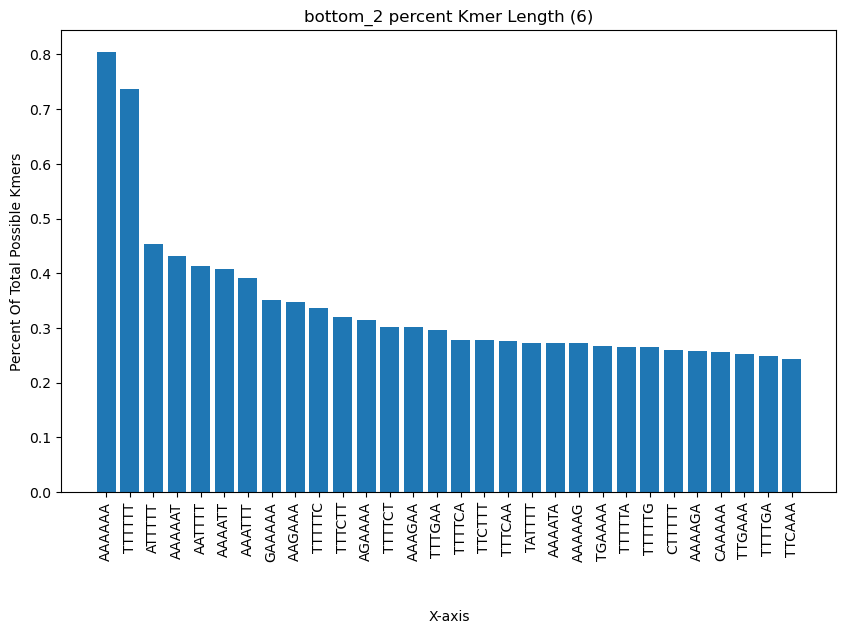

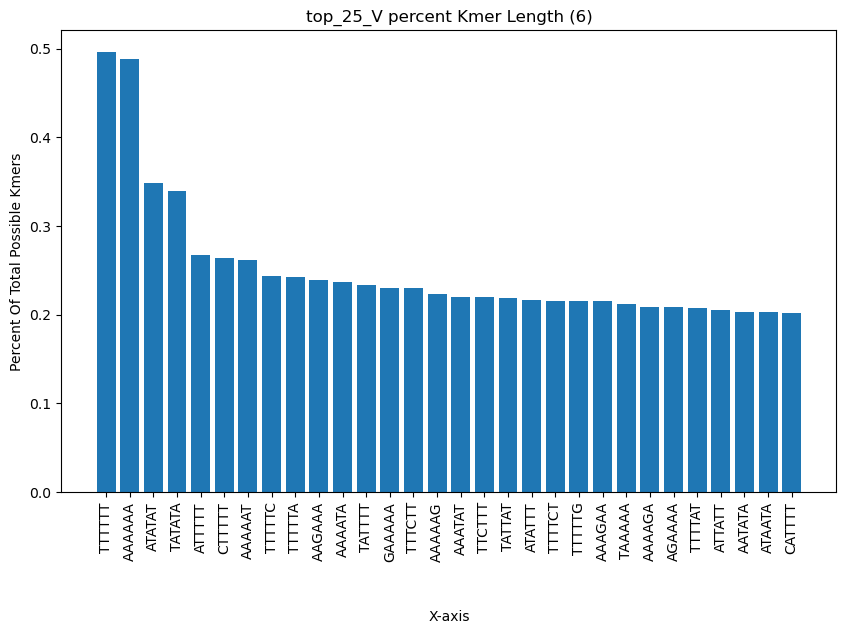

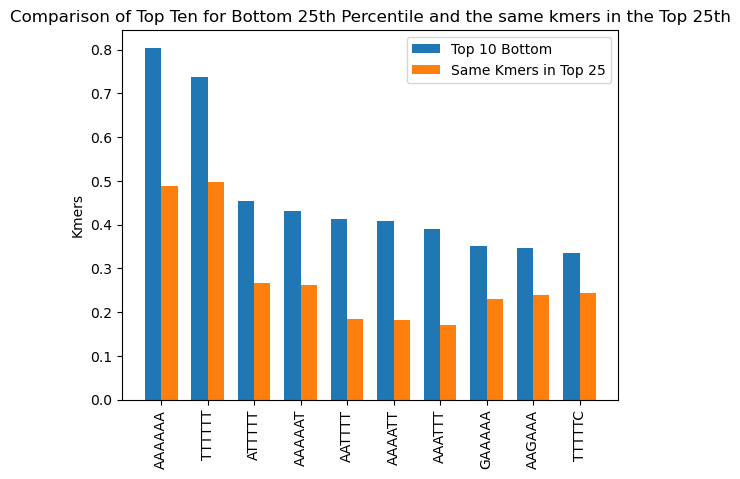

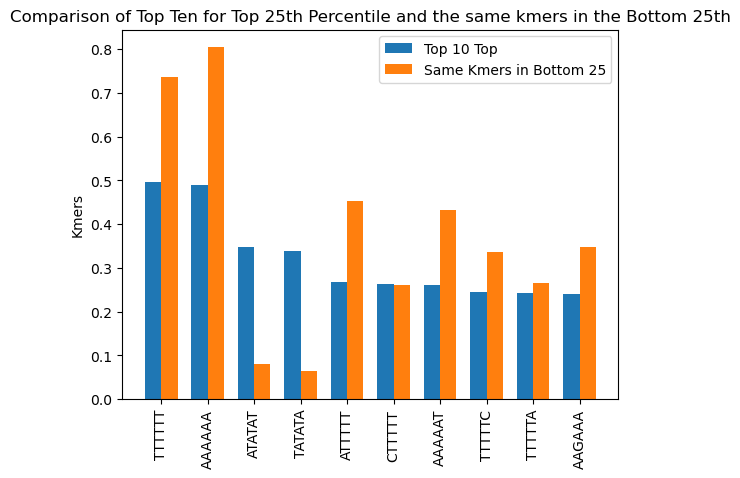

Top Ten Ratios (Bottom 25)
Kmer: TTTTTT, percent_instances: 0.49620029232669394
Kmer: AAAAAA, percent_instances: 0.4884336790554935
Kmer: ATATAT, percent_instances: 0.34885037943141917
Kmer: TATATA, percent_instances: 0.3395735913574853
Kmer: ATTTTT, percent_instances: 0.26751667934134804
Kmer: CTTTTT, percent_instances: 0.2642805904783479
Kmer: AAAAAT, percent_instances: 0.26147598013041434
Kmer: TTTTTC, percent_instances: 0.24400110027021343
Kmer: TTTTTA, percent_instances: 0.24184370769487995
Kmer: AAGAAA, percent_instances: 0.23947057586201315

Top Ten Ratios (Top 25)
Kmer: AAAAAA, percent_instances: 0.8047074305993777
Kmer: TTTTTT, percent_instances: 0.7373967822489739
Kmer: ATTTTT, percent_instances: 0.45326818007755826
Kmer: AAAAAT, percent_instances: 0.43147851506669044
Kmer: AATTTT, percent_instances: 0.4131406781763561
Kmer: AAAATT, percent_instances: 0.4073157182229557
Kmer: AAATTT, percent_instances: 0.39070379539288813
Kmer: GAAAAA, percent_instances: 0.35100777200675265
K

In [66]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 6)

# Kmer Length (7) using chrV.txt

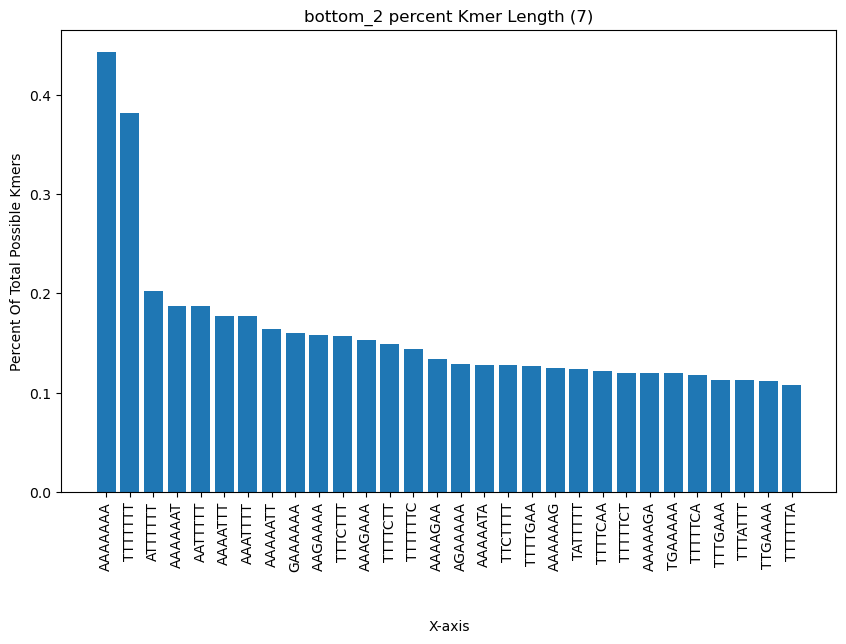

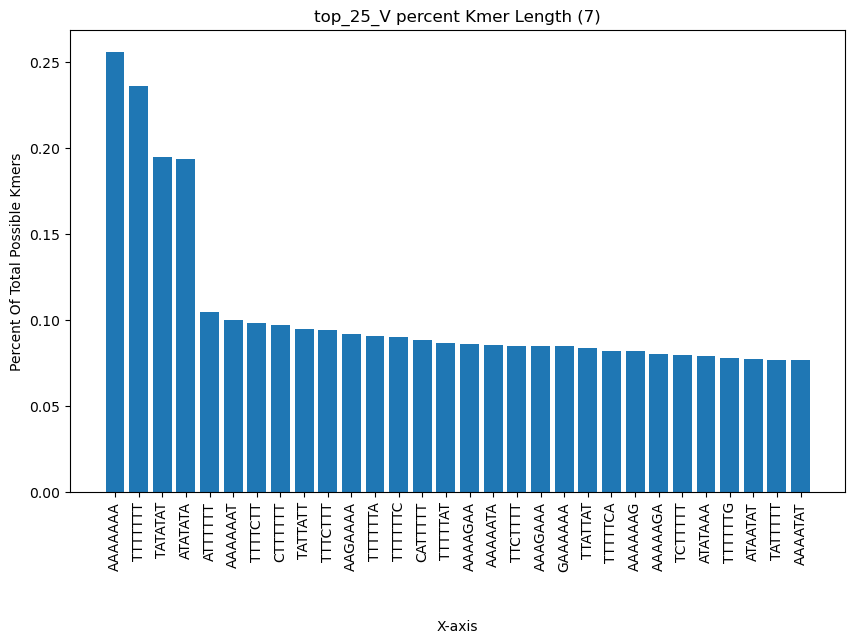

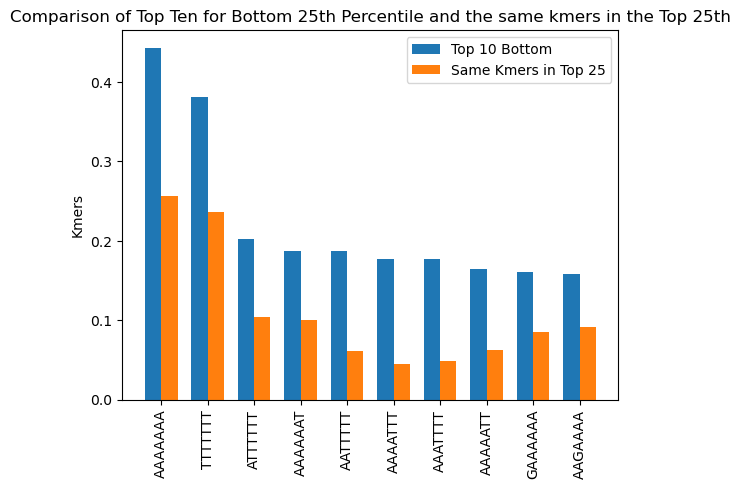

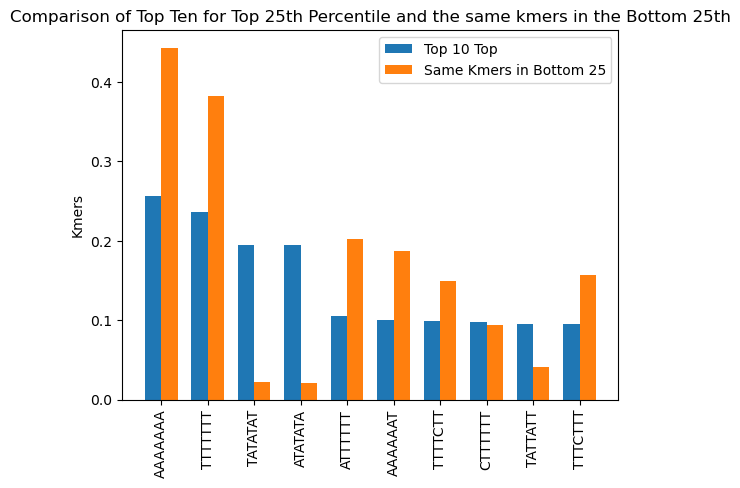

Top Ten Ratios (Bottom 25)
Kmer: AAAAAAA, percent_instances: 0.25594521007365045
Kmer: TTTTTTT, percent_instances: 0.2363080344731721
Kmer: TATATAT, percent_instances: 0.19460661662496526
Kmer: ATATATA, percent_instances: 0.1939446893575334
Kmer: ATTTTTT, percent_instances: 0.10458450825423303
Kmer: AAAAAAT, percent_instances: 0.10017165980468733
Kmer: TTTTCTT, percent_instances: 0.09840652042486905
Kmer: CTTTTTT, percent_instances: 0.09708266589000533
Kmer: TATTATT, percent_instances: 0.09487624166523248
Kmer: TTTCTTT, percent_instances: 0.09443495682027793

Top Ten Ratios (Top 25)
Kmer: AAAAAAA, percent_instances: 0.443049984334388
Kmer: TTTTTTT, percent_instances: 0.3814907484632255
Kmer: ATTTTTT, percent_instances: 0.2023291014116702
Kmer: AAAAAAT, percent_instances: 0.18732541668321487
Kmer: AATTTTT, percent_instances: 0.18710477426073757
Kmer: AAAATTT, percent_instances: 0.17739650767173704
Kmer: AAATTTT, percent_instances: 0.17695522282678244
Kmer: AAAAATT, percent_instances: 0.

In [67]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 7)

# Kmer Length (8) using chrV.txt

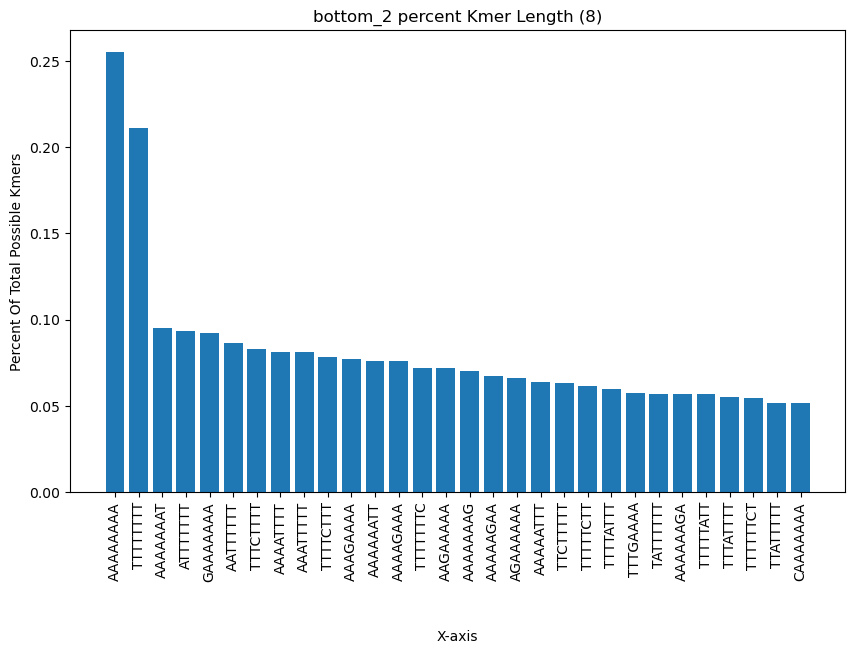

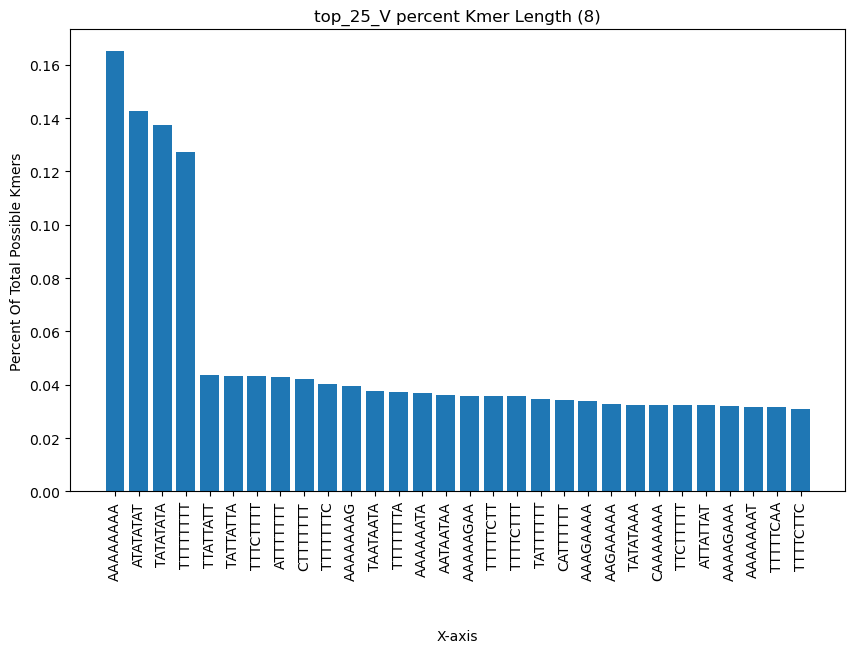

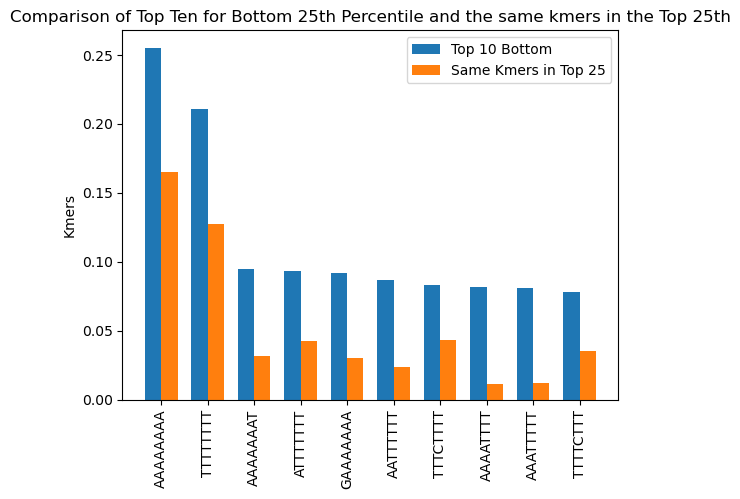

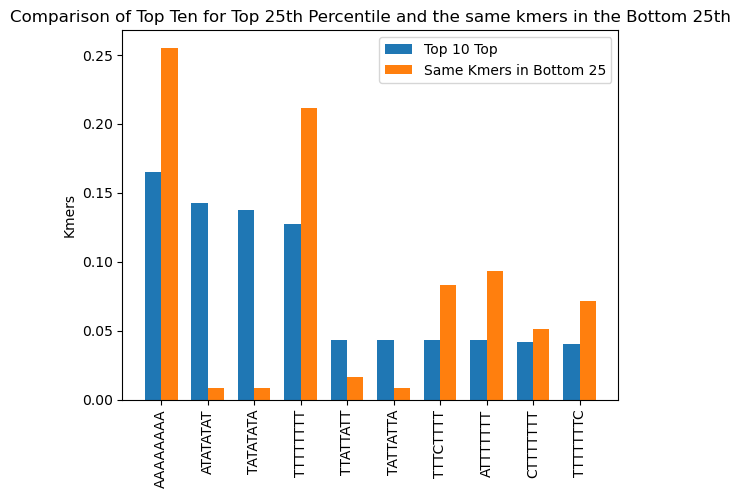

Top Ten Ratios (Bottom 25)
Kmer: AAAAAAAA, percent_instances: 0.16504053201300908
Kmer: ATATATAT, percent_instances: 0.14268894149414738
Kmer: TATATATA, percent_instances: 0.13749614773724012
Kmer: TTTTTTTT, percent_instances: 0.12733633386503027
Kmer: TTATTATT, percent_instances: 0.04357431282970007
Kmer: TATTATTA, percent_instances: 0.043348539188095406
Kmer: TTTCTTTT, percent_instances: 0.04312276554649075
Kmer: ATTTTTTT, percent_instances: 0.04289699190488608
Kmer: CTTTTTTT, percent_instances: 0.04199389733846742
Kmer: TTTTTTTC, percent_instances: 0.040413481847234776

Top Ten Ratios (Top 25)
Kmer: AAAAAAAA, percent_instances: 0.2551242150132698
Kmer: TTTTTTTT, percent_instances: 0.21109835490036047
Kmer: AAAAAAAT, percent_instances: 0.09505070311556336
Kmer: ATTTTTTT, percent_instances: 0.09347028762433073
Kmer: GAAAAAAA, percent_instances: 0.09211564577470274
Kmer: AATTTTTT, percent_instances: 0.08669707837619081
Kmer: TTTCTTTT, percent_instances: 0.08308470011051619
Kmer: AAAATT

In [68]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 8)

# Kmer Length (9) using chrV.txt

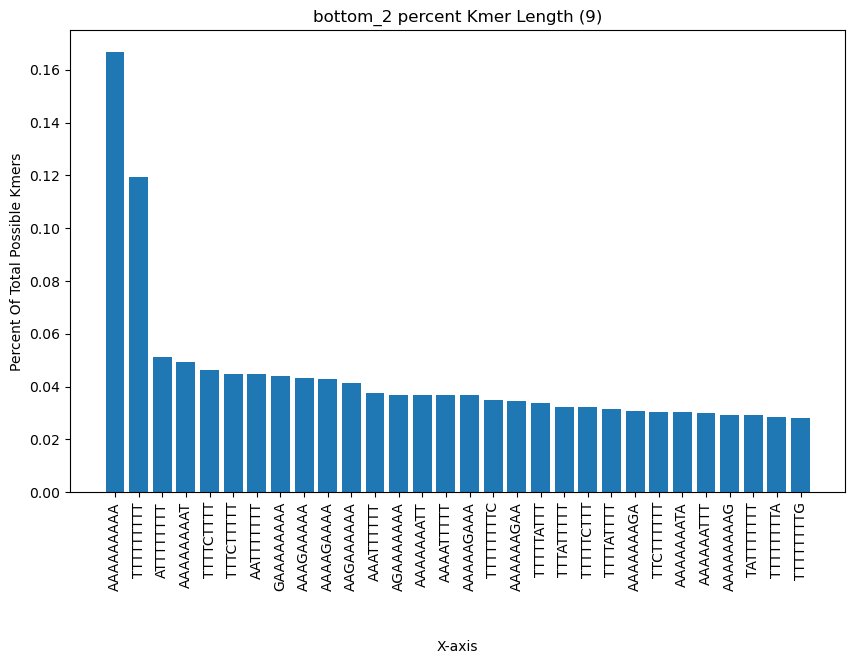

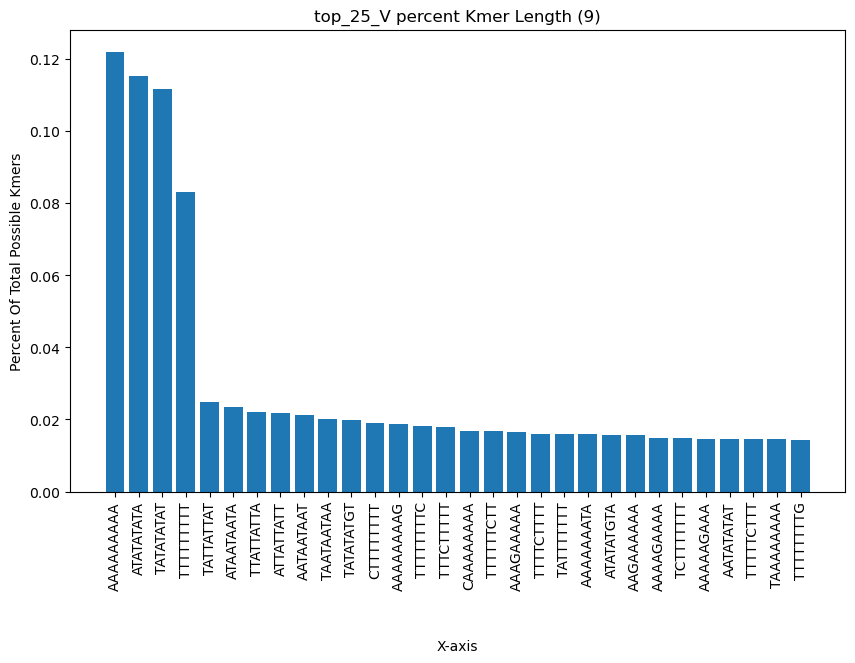

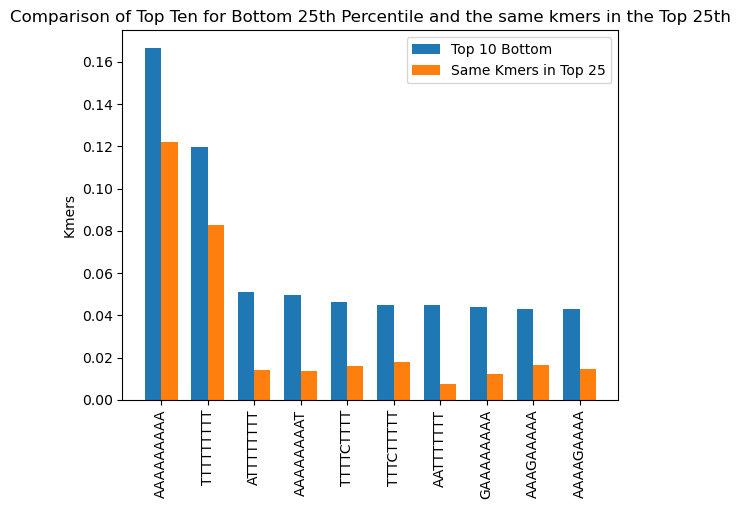

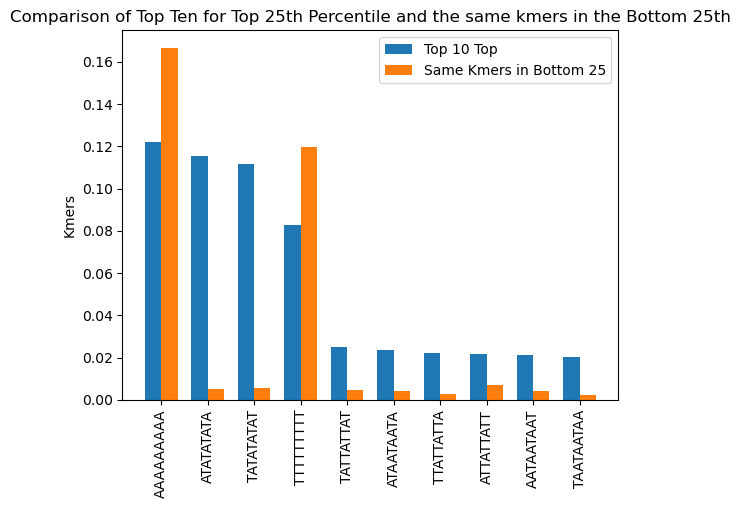

Top Ten Ratios (Bottom 25)
Kmer: AAAAAAAAA, percent_instances: 0.1220467799760067
Kmer: ATATATATA, percent_instances: 0.11534345304550633
Kmer: TATATATAT, percent_instances: 0.11164506577350615
Kmer: TTTTTTTTT, percent_instances: 0.08298256441550457
Kmer: TATTATTAT, percent_instances: 0.024964114086001375
Kmer: ATAATAATA, percent_instances: 0.023346069654501284
Kmer: TTATTATTA, percent_instances: 0.02195917442750121
Kmer: ATTATTATT, percent_instances: 0.021728025223001195
Kmer: AATAATAAT, percent_instances: 0.02126572681400117
Kmer: TAATAATAA, percent_instances: 0.020109980791501107

Top Ten Ratios (Top 25)
Kmer: AAAAAAAAA, percent_instances: 0.16665857644450915
Kmer: TTTTTTTTT, percent_instances: 0.11950413872650657
Kmer: ATTTTTTTT, percent_instances: 0.051083974194502814
Kmer: AAAAAAAAT, percent_instances: 0.04946592976300272
Kmer: TTTTCTTTT, percent_instances: 0.04646099010450255
Kmer: TTTCTTTTT, percent_instances: 0.04484294567300247
Kmer: AATTTTTTT, percent_instances: 0.0448429456

In [69]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 9)

# Kmer Length (10) using chrV.txt

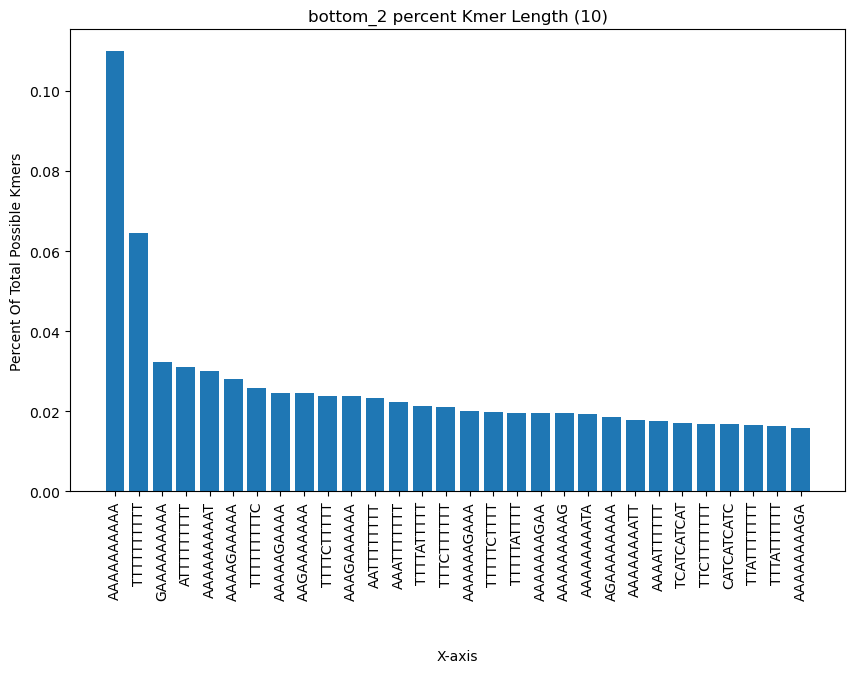

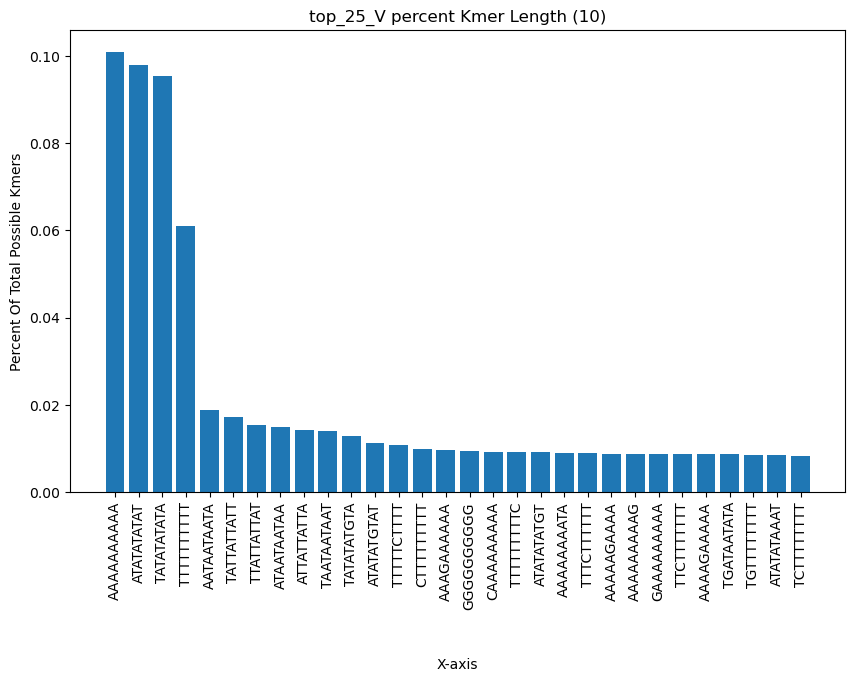

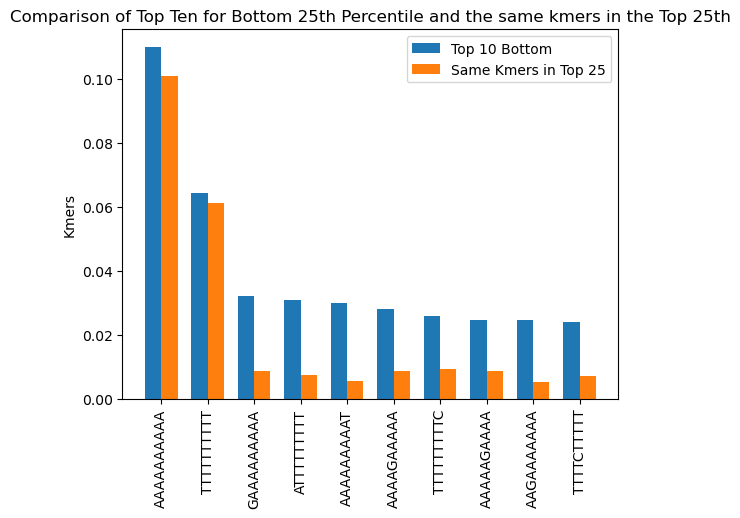

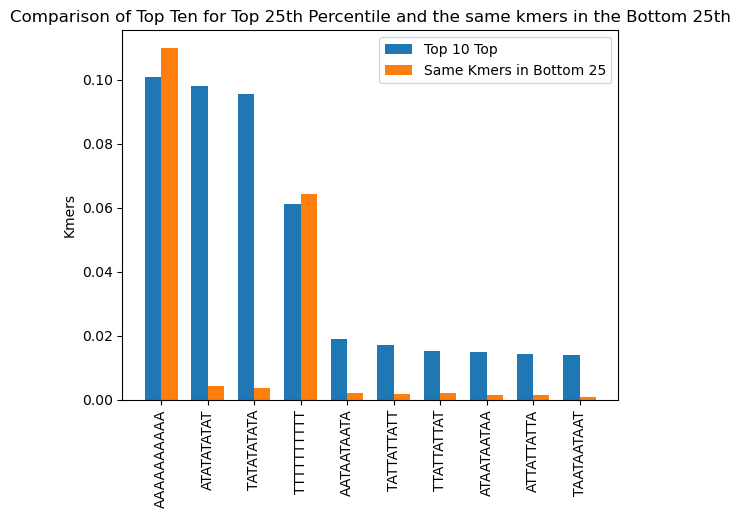

Top Ten Ratios (Bottom 25)
Kmer: AAAAAAAAAA, percent_instances: 0.1008712577296153
Kmer: ATATATATAT, percent_instances: 0.09802981384990782
Kmer: TATATATATA, percent_instances: 0.09542515696017598
Kmer: TTTTTTTTTT, percent_instances: 0.06109104341371068
Kmer: AATAATAATA, percent_instances: 0.018942959198049822
Kmer: TATTATTATT, percent_instances: 0.017285450268220464
Kmer: TTATTATTAT, percent_instances: 0.01539115434841548
Kmer: ATAATAATAA, percent_instances: 0.014917580368464236
Kmer: ATTATTATTA, percent_instances: 0.014207219398537366
Kmer: TAATAATAAT, percent_instances: 0.013970432408561743

Top Ten Ratios (Top 25)
Kmer: AAAAAAAAAA, percent_instances: 0.10986916334868896
Kmer: TTTTTTTTTT, percent_instances: 0.0644060612733694
Kmer: GAAAAAAAAA, percent_instances: 0.0322030306366847
Kmer: ATTTTTTTTT, percent_instances: 0.031019095686806587
Kmer: AAAAAAAAAT, percent_instances: 0.030071947726904094
Kmer: AAAAGAAAAA, percent_instances: 0.028177651807099115
Kmer: TTTTTTTTTC, percent_insta

In [70]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25_V.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25_V.txt", 10)